Utilizing small amounts of data to ensure data collection occured properly.

DATA IS FROM INITIALLY SCRAPED ORIGAMI MAIN PAGE IN R

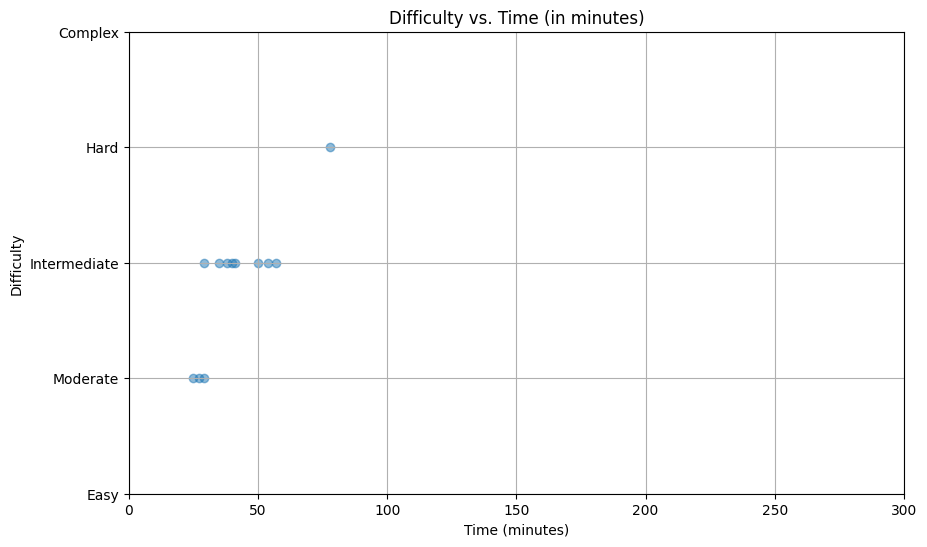

Unique time_minutes values: [29 25 41 27 50 35 40 38 54 57 78]
Unique Difficulty_Numeric values: [3, 2, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the data
df = pd.read_csv('origami_data_model.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], alpha=0.5)
plt.title('Difficulty vs. Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 300)  # Set x-axis limits from 0 to 300
plt.grid(True)
plt.show()

# Check for unique values in the relevant columns
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


Attempting regression model to assess correlation between variables

Attempting to create regression model - R-squared and MSE not reliable


Mean Squared Error: 0.21817116037258333
R-squared: 0.0
Cross-validated MSE: 0.11745908708845616


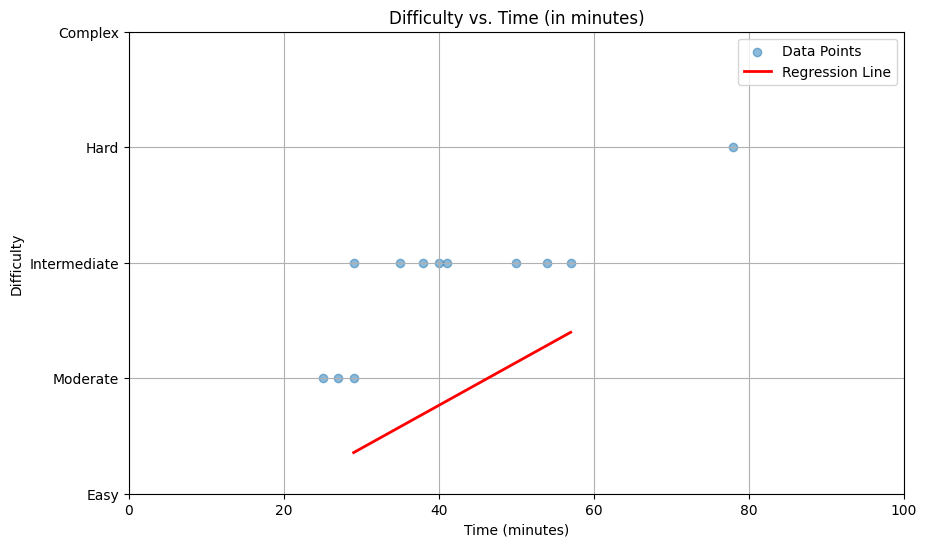

    Actual  Predicted
10       2   2.397722
9        2   2.286132
0        2   1.356215
Unique time_minutes values: [29 25 41 27 50 35 40 38 54 57 78]
Unique Difficulty_Numeric values: [3, 2, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


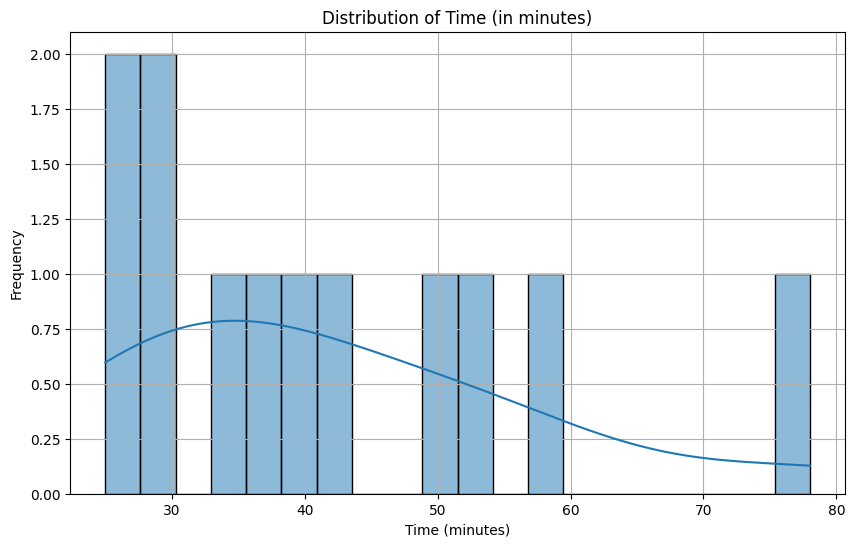

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Load the data
df = pd.read_csv('origami_data_model.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    try:
        hours = 0
        minutes = 0
        hour_match = re.search(r'(\d+)\s*hr', time_str)
        if hour_match:
            hours = int(hour_match.group(1))
        minute_match = re.search(r'(\d+)\s*min', time_str)
        if minute_match:
            minutes = int(minute_match.group(1))
        return hours * 60 + minutes
    except Exception as e:
        print(f"Error parsing time '{time_str}': {e}")
        return 0  # Default value

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Prepare the features and target variable
X = df[['time_minutes']]  # Features
y = df['Difficulty_Numeric'].cat.codes  # Target variable as numeric codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], alpha=0.5, label='Data Points')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Difficulty vs. Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

# Output predictions alongside actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(predictions_df)

# Check for unique values in the relevant columns
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())

# Optional: Visualize the distribution of time with a KDE overlay
plt.figure(figsize=(10, 6))
sns.histplot(df['time_minutes'], bins=20, kde=True)  # KDE overlay on histogram
plt.title('Distribution of Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



Produced closest regression model (R-squared and residual models were hard to create due to the discrete scale)

CALCULATED R-SQUARED TO BE

Coefficient of Determination (R-Squared): 0.6722

Adjusted R-Squared: 0.6394

Based on https://exploringfinance.com/coefficient-of-determination-r-squared-calculator/ Calculator

THERE ARE VERY FEW POINTS SO I DON'T EXPECT A HIGH CORRELATION BUT IN HTIS CODE I PROVIDE A POTENTIAL REGRESSION MODEL however the r-squared and MSE are not reliable here

I did calculate R-squared based on point locations as seen above

Mean Squared Error: 0.21817116037258333
R-squared: 0.0
Cross-validated MSE: 0.11745908708845616


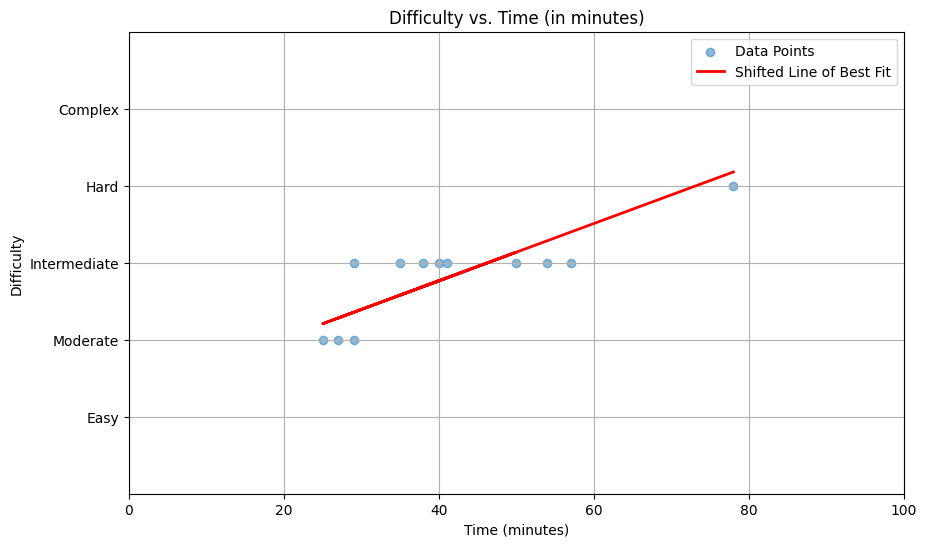

    Actual  Predicted
10       2   2.397722
9        2   2.286132
0        2   1.356215
Unique time_minutes values: [29 25 41 27 50 35 40 38 54 57 78]
Unique Difficulty_Numeric values: [3, 2, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


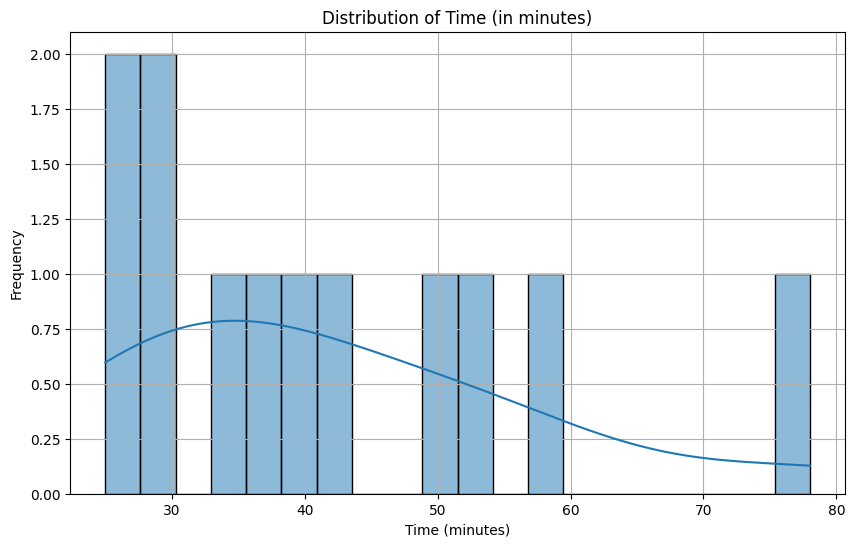

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Load the data
df = pd.read_csv('origami_data_model.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    try:
        hours = 0
        minutes = 0
        hour_match = re.search(r'(\d+)\s*hr', time_str)
        if hour_match:
            hours = int(hour_match.group(1))
        minute_match = re.search(r'(\d+)\s*min', time_str)
        if minute_match:
            minutes = int(minute_match.group(1))
        return hours * 60 + minutes
    except Exception as e:
        print(f"Error parsing time '{time_str}': {e}")
        return 0  # Default value

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Prepare the features and target variable
X = df[['time_minutes']]  # Features
y = df['Difficulty_Numeric'].cat.codes  # Target variable as numeric codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the entire dataset for the line of best fit
predictions_full = model.predict(X)

# Raise the line on the y-axis by adding a constant (e.g., 1)
y_shift = 1  # Adjust this value as needed
predictions_shifted = predictions_full + y_shift

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], alpha=0.5, label='Data Points')
plt.plot(df['time_minutes'], predictions_shifted, color='red', linewidth=2, label='Shifted Line of Best Fit')
plt.title('Difficulty vs. Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])
plt.xlim(0, 100)
plt.ylim(0, 6)  # Adjust y-axis limits if necessary
plt.grid(True)
plt.legend()
plt.show()

# Output predictions alongside actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(predictions_df)

# Check for unique values in the relevant columns
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())

# Optional: Visualize the distribution of time with a KDE overlay
plt.figure(figsize=(10, 6))
sns.histplot(df['time_minutes'], bins=20, kde=True)  # KDE overlay on histogram
plt.title('Distribution of Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Creating adjusted difficulty scale based on number of folds and time taken. This could only be done with the models whose number of folds were counted. THIS INVOLVES THE DATASET IN OVERLEAF WEHERE I COUNTED THE NUMBER OF FOLDS FOR EACH MODEL.
THE DIFFICULTY LEANS TOWARDS EASY AND I DIDNT HAVE TIME TO COUNT OR PREDICT NUMBER OF FOLDS FOR HARDER MODELS.
WILL DO THIS IN THE FUTURE

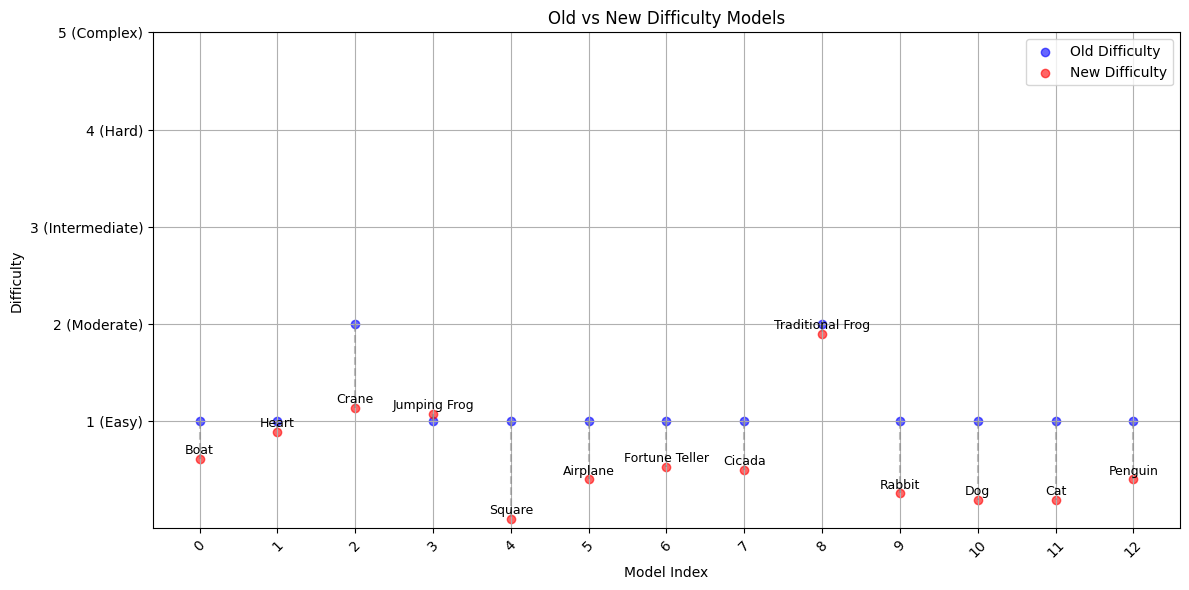

               model  number_of_folds  time_minutes difficulty  \
0               Boat               10           2.0       Easy   
1              Heart               13           4.0       Easy   
2              Crane               16           5.0   Moderate   
3       Jumping Frog               16           3.0       Easy   
4             Square                2           0.5       Easy   
5           Airplane                7           2.0       Easy   
6     Fortune Teller                8           4.0       Easy   
7             Cicada                8           3.0       Easy   
8   Traditional Frog               23          14.0   Moderate   
9             Rabbit                5           2.0       Easy   
10               Dog                4           2.0       Easy   
11               Cat                4           2.0       Easy   
12           Penguin                7           2.0       Easy   

    difficulty_numeric  new_difficulty  
0                    1        0.61

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with the provided dataset
data = {
    'model': [
        'Boat', 'Heart', 'Crane', 'Jumping Frog', 'Square',
        'Airplane', 'Fortune Teller', 'Cicada', 'Traditional Frog',
        'Rabbit', 'Dog', 'Cat', 'Penguin'
    ],
    'number_of_folds': [10, 13, 16, 16, 2, 7, 8, 8, 23, 5, 4, 4, 7],
    'time_minutes': [2, 4, 5, 3, 0.5, 2, 4, 3, 14, 2, 2, 2, 2],
    'difficulty': ['Easy', 'Easy', 'Moderate', 'Easy', 'Easy',
                  'Easy', 'Easy', 'Easy', 'Moderate', 'Easy',
                  'Easy', 'Easy', 'Easy']
}

#NOTE: boat, fortune teller, and square can be recursively designed (making a smaller boat out of a larger one) which would increase the time and difficulty in some sense.

df = pd.DataFrame(data)

# Map difficulties to numeric values
difficulty_mapping = {
    'Easy': 1,
    'Moderate': 2,
    'Intermediate': 3,
    'Hard': 4,
    'Complex': 5  # Placeholder for future use
}
df['difficulty_numeric'] = df['difficulty'].map(difficulty_mapping)

# Assign weights for Time and Number of Folds
w1 = 0.4  # Weight for Time
w2 = 1.5 # Weight for Number of Folds

# Normalize Time and Number of Folds
df['time_normalized'] = (df['time_minutes'] - df['time_minutes'].min()) / (df['time_minutes'].max() - df['time_minutes'].min())
df['folds_normalized'] = (df['number_of_folds'] - df['number_of_folds'].min()) / (df['number_of_folds'].max() - df['number_of_folds'].min())

# Calculate New Continuous Difficulty
df['new_difficulty'] = w1 * df['time_normalized'] + w2 * df['folds_normalized']

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for old difficulty
plt.scatter(range(len(df)), df['difficulty_numeric'], color='blue', label='Old Difficulty', alpha=0.6)

# Scatter plot for new difficulty
plt.scatter(range(len(df)), df['new_difficulty'], color='red', label='New Difficulty', alpha=0.6)

# Adding annotations for each point
for i, row in df.iterrows():
    plt.annotate(row['model'], (i, row['new_difficulty'] + 0.05), fontsize=9, ha='center')

# Adding lines to show new difficulty more clearly
for i, row in df.iterrows():
    plt.plot([i, i], [row['difficulty_numeric'], row['new_difficulty']], color='gray', linestyle='--', alpha=0.5)

# Adding titles and labels
plt.title('Old vs New Difficulty Models')
plt.xlabel('Model Index')
plt.ylabel('Difficulty')
plt.xticks(range(len(df)), rotation=45)
plt.yticks([1, 2, 3, 4, 5], ['1 (Easy)', '2 (Moderate)', '3 (Intermediate)', '4 (Hard)', '5 (Complex)'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display the DataFrame for reference
print(df[['model', 'number_of_folds', 'time_minutes', 'difficulty', 'difficulty_numeric', 'new_difficulty']])


Plotting fully scraped data (in R) of all 452 models

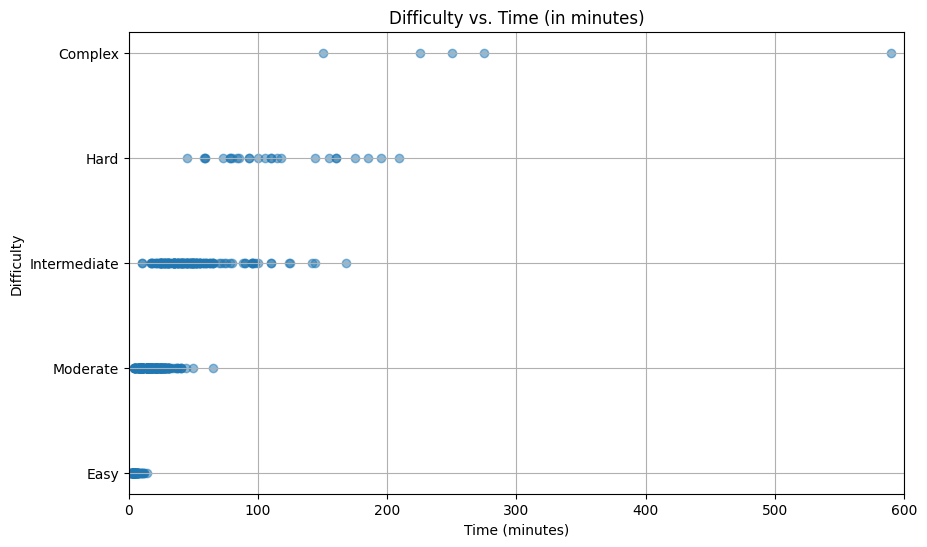

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [1, 3, 4, 5, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], alpha=0.5)
plt.title('Difficulty vs. Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 600)  # Set x-axis limits from 0 to 300
plt.grid(True)
plt.show()

# Check for unique values in the relevant columns
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


In [ ]:
#OUTLIER CHART VISUALIZATION

In this case I removed outliers based on the time and the IQR of the time (this removed all instances in complex difficulty category)

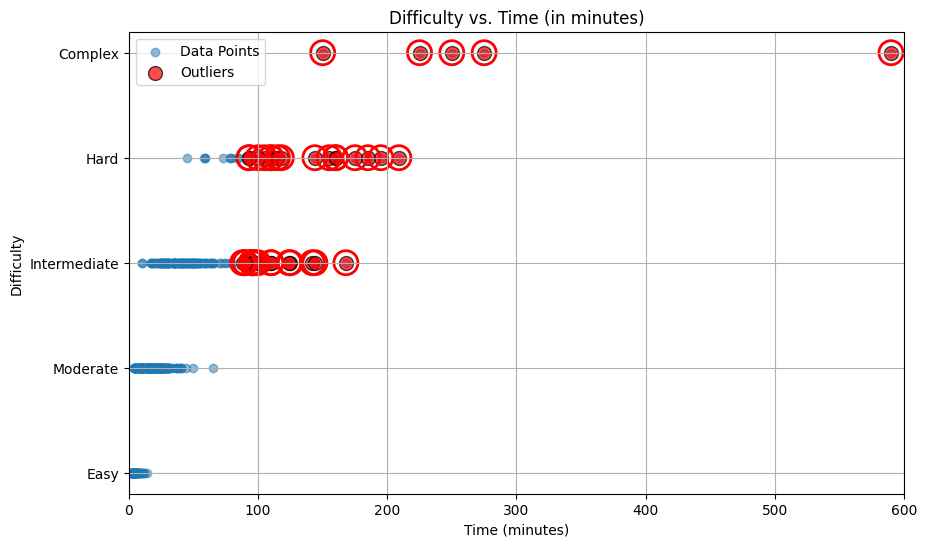

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [1, 3, 4, 5, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
Outliers identified:
                                                  Image  \
1    https://origami-database.com/wp-content/upload...   
2    https://origami-database.com/wp-content/upload...   
5    https://origami-database.com/wp-content/upload...   
11   https://origami-database.com/wp-content/upload...   
18   https://origami-database.com/wp-content/upload...   
21   https://origami-database.com/wp-content/upload...   
27   https://origami-database.com/wp-content/upload...   
39

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Calculate IQR for time_minutes
Q1 = df['time_minutes'].quantile(0.25)
Q3 = df['time_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['Outlier'] = (df['time_minutes'] < lower_bound) | (df['time_minutes'] > upper_bound)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], alpha=0.5, label='Data Points')

# Highlight outliers in the plot
outliers = df[df['Outlier']]
plt.scatter(outliers['time_minutes'], outliers['Difficulty_Numeric'],
            color='red', label='Outliers', alpha=0.7, edgecolor='black', s=100)  # Circling outliers

# Circle outliers
for index, row in outliers.iterrows():
    plt.scatter(row['time_minutes'], row['Difficulty_Numeric'],
                color='none', edgecolor='red', s=300, linewidth=2)  # Draw circles around outliers

plt.title('Difficulty vs. Time (in minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 600)  # Set x-axis limits from 0 to 600
plt.grid(True)
plt.legend()
plt.show()

# Check for unique values in the relevant columns
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())
print("Outliers identified:\n", df[df['Outlier']])


highlighted outliers per difficulty group. Allows all difficulties to be present

<ipython-input-181-ca935ad89670>:55: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-181-ca935ad89670>:55: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Outliers for each difficulty group:
                                                 Image  \
0   https://origami-database.com/wp-content/upload...   
1   https://origami-database.com/wp-content/upload...   
2   https://origami-database.com/wp-content/upload...   
3   https://origami-database.com/wp-content/upload...   
4   https://origami-database.com/wp-content/upload...   
5   https://origami-database.com/wp-content/upload...   
6   https://origami-database.com/wp-content/upload...   
7   https://origami-database.com/wp-content/upload...   
8   https://origami-database.com/wp-content/upload...   
9   https://origami-database.com/wp-content/upload...   
10  https://origami-database.com/wp-content/upload...   
11  https://origami-database.com/wp-content/upload...   
12  https://origami-database.com/wp-content/upload...   
13  https://origami-database.com/wp-content/upload...   
14  https://origami-database.com/wp-content/upload...   
15  https://origami-database.com/wp-content/upload.

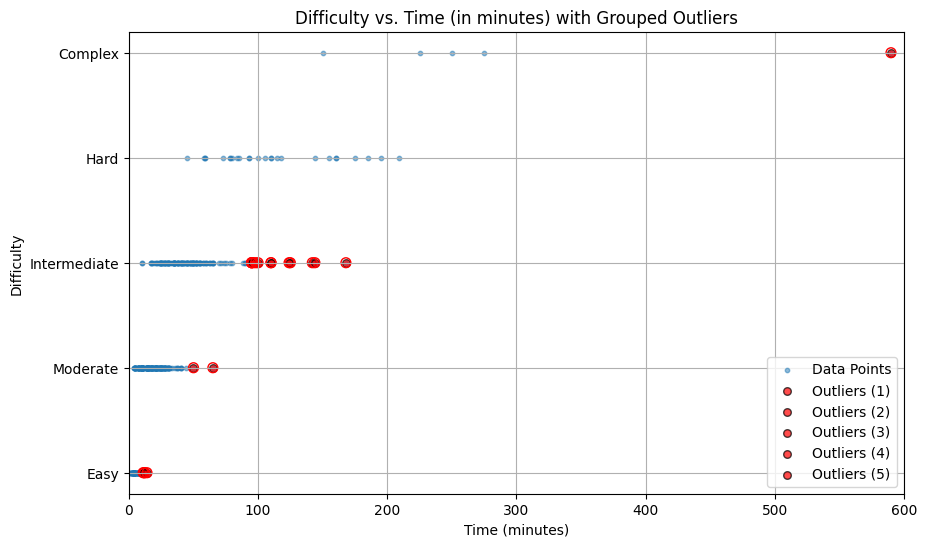

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Create a function to identify outliers within each group
def find_outliers(group):
    Q1 = group['time_minutes'].quantile(0.25)
    Q3 = group['time_minutes'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['time_minutes'] < lower_bound) | (group['time_minutes'] > upper_bound)]

# Identify outliers for each difficulty group
outliers_per_group = df.groupby('Difficulty_Numeric').apply(find_outliers).reset_index(drop=True)

# Print outliers for each group
print("Outliers for each difficulty group:\n", outliers_per_group)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], alpha=0.5, label='Data Points', s=10)  # Smaller points

# Highlight outliers in the plot
for difficulty in df['Difficulty_Numeric'].cat.categories:
    outliers = outliers_per_group[outliers_per_group['Difficulty_Numeric'] == difficulty]
    plt.scatter(outliers['time_minutes'], outliers['Difficulty_Numeric'],
                color='red', label=f'Outliers ({difficulty})', alpha=0.7, edgecolor='black', s=30)  # Smaller outlier points

    # Circle outliers
    for index, row in outliers.iterrows():
        plt.scatter(row['time_minutes'], row['Difficulty_Numeric'],
                    color='none', edgecolor='red', s=50, linewidth=1)  # Draw circles around outliers

plt.title('Difficulty vs. Time (in minutes) with Grouped Outliers')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 600)  # Set x-axis limits from 0 to 600
plt.grid(True)
plt.legend()
plt.show()


Plots polynomial model without outliers

<ipython-input-182-82986f919fc7>:58: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-182-82986f919fc7>:58: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



R-squared: 0.612
Coefficients: [ 0.00000000e+00  2.30397037e-02 -3.15266266e-05]
Intercept: 1.650


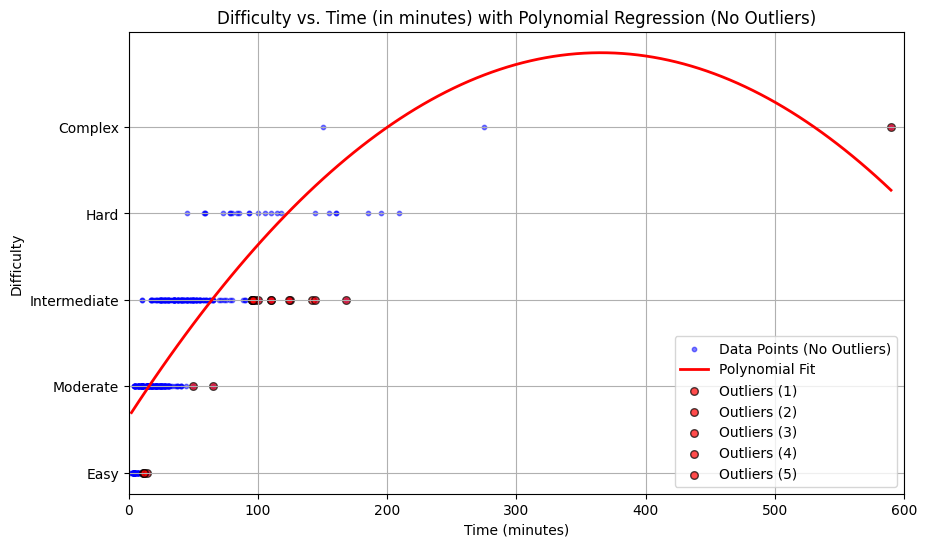

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Create a function to identify outliers within each group
def find_outliers(group):
    Q1 = group['time_minutes'].quantile(0.25)
    Q3 = group['time_minutes'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['time_minutes'] < lower_bound) | (group['time_minutes'] > upper_bound)]

# Identify outliers for each difficulty group
outliers_per_group = df.groupby('Difficulty_Numeric').apply(find_outliers).reset_index(drop=True)

# Filter out the outliers from the original DataFrame
df_no_outliers = df[~df.index.isin(outliers_per_group.index)]

# Prepare data for polynomial regression
X = df_no_outliers['time_minutes'].values.reshape(-1, 1)  # Reshape for sklearn
y = df_no_outliers['Difficulty_Numeric'].values

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create predictions for the polynomial regression line
y_pred = model.predict(X_poly)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Output the results
print(f"R-squared: {r_squared:.3f}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.3f}")

# Create a scatter plot with the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['time_minutes'], df_no_outliers['Difficulty_Numeric'],
            color='blue', alpha=0.5, label='Data Points (No Outliers)', s=10)  # Smaller points

# Plot polynomial regression line
x_range = np.linspace(df_no_outliers['time_minutes'].min(), df_no_outliers['time_minutes'].max(), 100).reshape(-1, 1)
y_range_poly = model.predict(poly.transform(x_range))
plt.plot(x_range, y_range_poly, color='red', label='Polynomial Fit', linewidth=2)

# Highlight outliers in the plot
for difficulty in df['Difficulty_Numeric'].cat.categories:
    outliers = outliers_per_group[outliers_per_group['Difficulty_Numeric'] == difficulty]
    plt.scatter(outliers['time_minutes'], outliers['Difficulty_Numeric'],
                color='red', label=f'Outliers ({difficulty})', alpha=0.7, edgecolor='black', s=30)  # Smaller outlier points

plt.title('Difficulty vs. Time (in minutes) with Polynomial Regression (No Outliers)')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 600)  # Set x-axis limits from 0 to 600
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 57.0 MB/s eta 0:00:00


Plotting interactive scatter plot with descriptions and images of each origami model

In [ ]:
import pandas as pd
import numpy as np
import re
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Prepare data for linear regression
X = df['time_minutes'].values.reshape(-1, 1)
y = df['Difficulty_Numeric'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Create predictions for the regression line
y_pred = model.predict(X)

# Create the Dash app
app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='scatter-plot', style={'height': '80vh'}),
    html.Div(id='button-container', style={'display': 'flex', 'justify-content': 'center', 'margin-top': '10px'}),
    html.Button("Reset Graph", id='reset-button', n_clicks=0),
    dcc.Tooltip(id='graph-tooltip',
                show=False,
                children=[],
                style={"pointer-events": "none", 'max-width': '800px', 'background-color': 'lightblue'}),
])

@app.callback(
    Output('scatter-plot', 'figure'),
    Input('scatter-plot', 'hoverData'),
    Input('reset-button', 'n_clicks'),
    Input('scatter-plot', 'clickData')
)
def update_graph(hoverData, n_clicks, clickData):
    # Create the figure
    fig = go.Figure()

    # Add scatter plot for points
    fig.add_trace(go.Scatter(
        x=df['time_minutes'],
        y=df['Difficulty_Numeric'],
        mode='markers',
        text=df['Name'],
        hoverinfo='none',
        customdata=df[['Description', 'Image']],
        name='Points',
    ))

    # Add regression line
    fig.add_trace(go.Scatter(
        x=df['time_minutes'],
        y=y_pred,
        mode='lines',
        name='Line of Best Fit',
        line=dict(color='red')
    ))

    # Update layout with y-axis limit
    fig.update_layout(
        title='Difficulty vs. Time with Linear Regression',
        xaxis_title='Time (minutes)',
        yaxis_title='Difficulty',
        height=600,
        width=900
    )

    # Set y-axis range
    fig.update_yaxes(range=[0, 6.5])  # Limit y-axis from 0 to 6.5

    # If the reset button is clicked or empty space is clicked, return the initial state
    if n_clicks > 0 or clickData is None:
        return fig

    return fig

@app.callback(
    Output('graph-tooltip', 'show'),
    Output('graph-tooltip', 'bbox'),
    Output('graph-tooltip', 'children'),
    Input('scatter-plot', 'hoverData'),
)
def display_hover(hoverData):
    if hoverData:
        pt = hoverData['points'][0]
        bbox = pt['bbox']  # Get bounding box coordinates
        index = pt['pointIndex']  # Get index of the point hovered
        img_src = df['Image'][index]  # Get the image URL

        # Create tooltip content with image
        children = [
            html.Div([
                html.Img(src=img_src, style={"width": "120px", "height": "auto"}),
                html.P(f"Name: {df['Name'][index]}"),
                html.P(f"Time: {df['Time'][index]}"),
                html.P(f"Difficulty: {df['Difficulty'][index]}"),
                html.P(f"Description: {df['Description'][index]}"),
            ], style={
                'width': '585px',
                'height': '300px',
                'overflow': 'auto',
                'border': '1px solid black',
                'padding': '10px',
                'box-sizing': 'border-box',
                'background-color': 'lightblue'
            })
        ]
        return True, bbox, children  # Show tooltip with content

    return False, None, []  # No tooltip if not hovering

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Prepare data for linear regression
X = df['time_minutes'].values.reshape(-1, 1)  # Reshape for sklearn
y = df['Difficulty_Numeric'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Create predictions for the regression line
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Get coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Output the results
print(f"R-squared: {r_squared:.3f}")
print(f"Slope (Coefficient of Time): {slope:.3f}")
print(f"Intercept: {intercept:.3f}")

# Create a scatter plot with the regression line
fig = px.scatter(df, x='time_minutes', y='Difficulty_Numeric',
                 title='Difficulty vs. Time with Linear Regression',
                 labels={'Difficulty_Numeric': 'Difficulty'},
                 hover_data={'Time': True, 'Difficulty': True, 'Name': True, 'Description': True})

# Add the regression line to the plot
fig.add_scatter(x=df['time_minutes'], y=y_pred, mode='lines', name='Line of Best Fit', line=dict(color='red'))

# Show the figure
fig.show()


R-squared: 0.489
Slope (Coefficient of Time): 0.013
Intercept: 1.886


Polynomial regression (worse than regression excluding outliers)

R-squared: 0.634
Coefficients: [ 0.00000000e+00  2.29284418e-02 -3.16995584e-05]
Intercept: 1.637


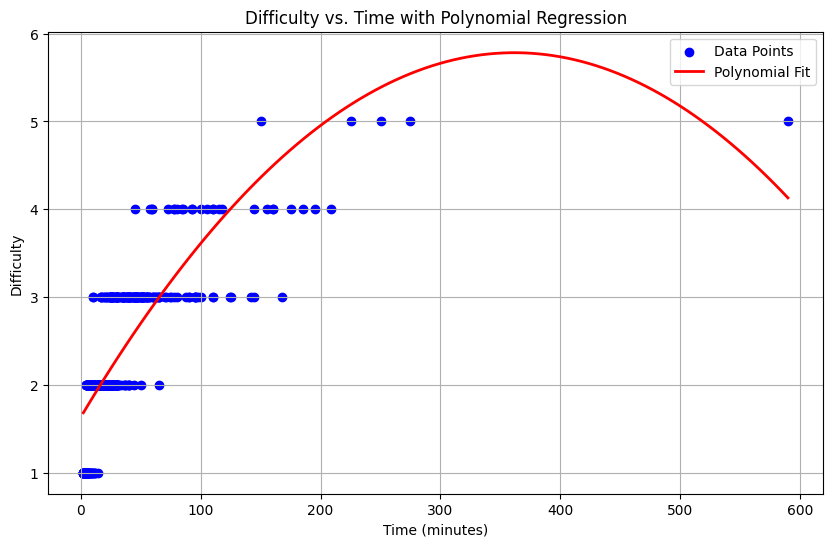

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Origo_Database.csv')  # Ensure the file path is correct

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Prepare data for polynomial regression
X = df['time_minutes'].values.reshape(-1, 1)
y = df['Difficulty_Numeric'].values

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create predictions for the polynomial regression line
y_pred = model.predict(X_poly)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Output the results
print(f"R-squared: {r_squared:.3f}")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept:.3f}")

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], color='blue', label='Data Points')

# Create a smooth line for the polynomial fit
x_range = np.linspace(df['time_minutes'].min(), df['time_minutes'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.plot(x_range, y_range_pred, color='red', label='Polynomial Fit', linewidth=2)
plt.title('Difficulty vs. Time with Polynomial Regression')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.legend()
plt.grid()
plt.show()


Plot of decision tree overlayed with polynomial regression

Polynomial R-squared: 0.634
Decision Tree R-squared: 0.817


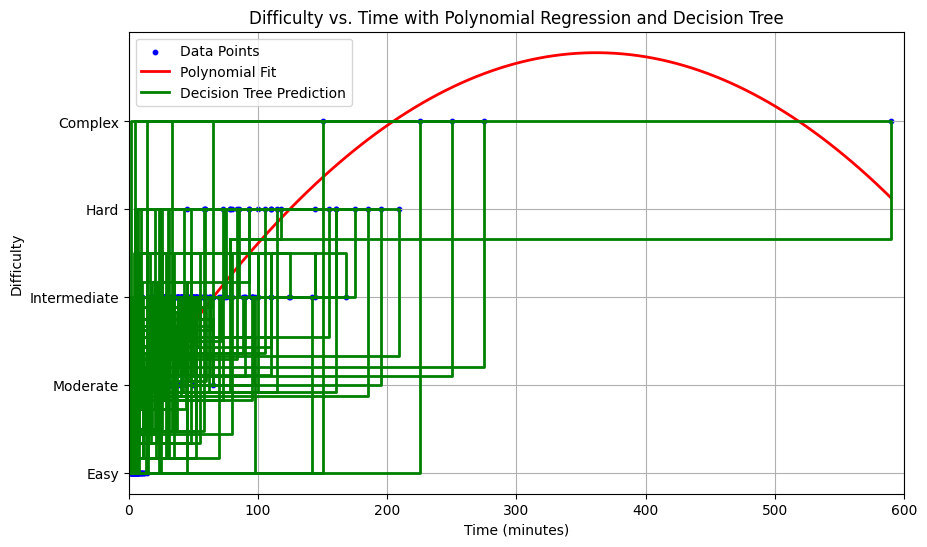

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Origo_Database.csv')  # Ensure the file path is correct

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Prepare data for polynomial regression
X = df['time_minutes'].values.reshape(-1, 1)
y = df['Difficulty_Numeric'].values

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
linear_model = LinearRegression()
linear_model.fit(X_poly, y)

# Create predictions for the polynomial regression line
y_pred_poly = linear_model.predict(X_poly)

# Fit a decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=9)
tree_model.fit(X, y)

# Create predictions for the decision tree
y_pred_tree = tree_model.predict(X)

# Calculate R-squared values
r_squared_poly = r2_score(y, y_pred_poly)
r_squared_tree = r2_score(y, y_pred_tree)

# Output the results
print(f"Polynomial R-squared: {r_squared_poly:.3f}")
print(f"Decision Tree R-squared: {r_squared_tree:.3f}")

# Create a scatter plot with the regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df['time_minutes'], df['Difficulty_Numeric'], color='blue', label='Data Points', s=10)

# Create a smooth line for the polynomial fit
x_range = np.linspace(df['time_minutes'].min(), df['time_minutes'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred_poly = linear_model.predict(x_range_poly)

plt.plot(x_range, y_range_pred_poly, color='red', label='Polynomial Fit', linewidth=2)

# Plot the decision tree predictions as a step function
plt.step(X.flatten(), y_pred_tree, color='green', label='Decision Tree Prediction', where='post', linewidth=2)

plt.title('Difficulty vs. Time with Polynomial Regression and Decision Tree')
plt.xlabel('Time (minutes)')
plt.ylabel('Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 600)  # Set x-axis limits from 0 to 600
plt.grid()
plt.legend()
plt.show()


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


Attempting to create SHAP values

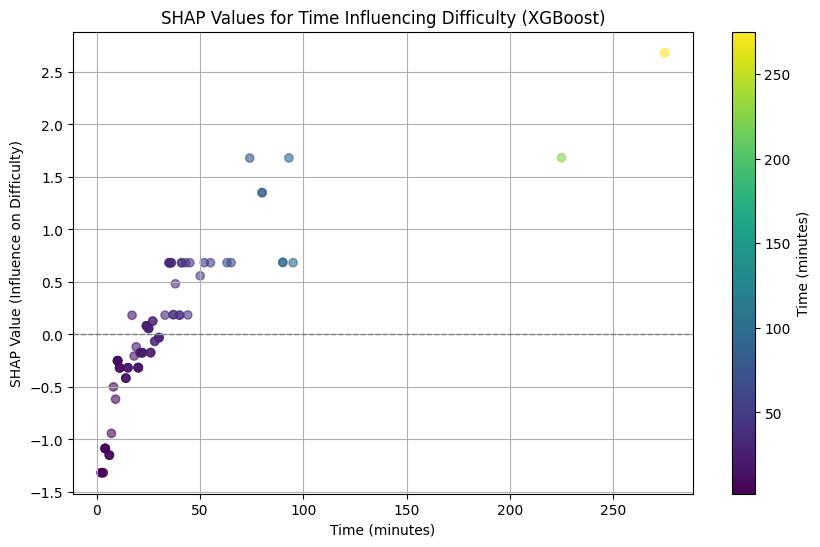

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 1
[LightGBM] [Info] Start training from score 2.316667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

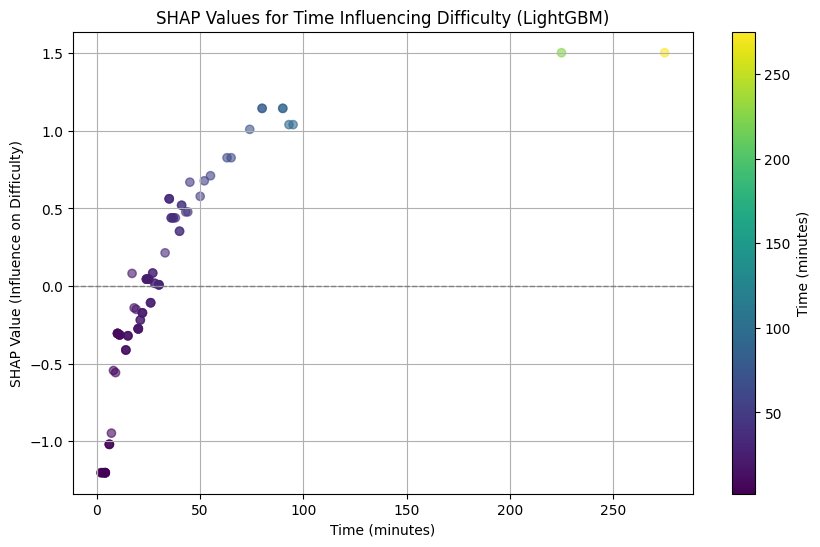

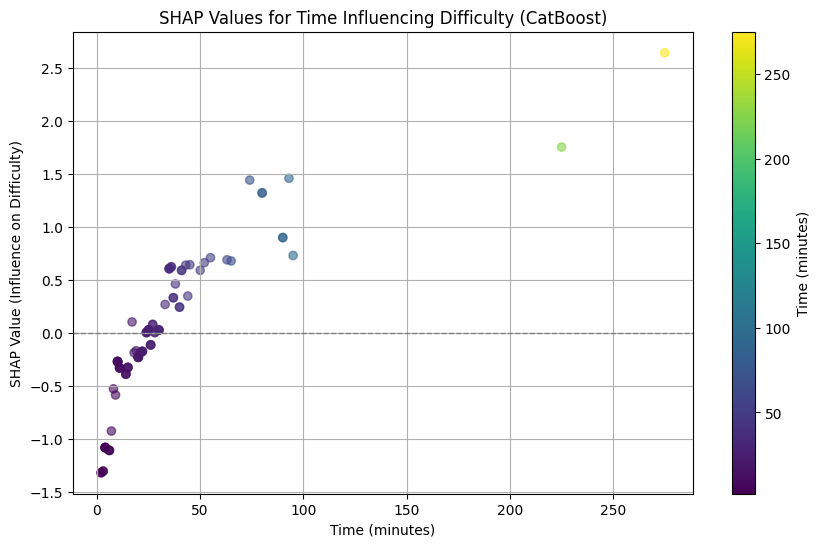

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import shap
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Map the Difficulty column to the new numeric column
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Prepare data for regression
X = df[['time_minutes']]
y = df['Difficulty_Numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create SHAP plots for a given model
def plot_shap_values(model, X_test, model_name):
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    # Extract SHAP values and corresponding time values
    shap_values_array = shap_values.values
    time_values = X_test['time_minutes'].values

    # Normalize time values for color mapping
    norm = plt.Normalize(time_values.min(), time_values.max())
    colors = cm.viridis(norm(time_values))

    # Create a scatter plot for SHAP values
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(time_values, shap_values_array, c=colors, alpha=0.6)
    plt.title(f'SHAP Values for Time Influencing Difficulty ({model_name})')
    plt.xlabel('Time (minutes)')
    plt.ylabel('SHAP Value (Influence on Difficulty)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.grid(True)

    # Add a colorbar
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=plt.gca())
    cbar.set_label('Time (minutes)')
    plt.show()

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
plot_shap_values(xgb_model, X_test, "XGBoost")

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
plot_shap_values(lgb_model, X_test, "LightGBM")

# Train the CatBoost model
cat_model = cb.CatBoostRegressor(silent=True)
cat_model.fit(X_train, y_train)
plot_shap_values(cat_model, X_test, "CatBoost")


SHAP VALUES FOR EACH BOOSING METHOD. WOULD BE MORE USEFUL I F I HAD OTHER VARIABLES TO ASSESS IN RELATION TO CONTRIBUTING TO THE DIFFICULTY SCORE

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 1
[LightGBM] [Info] Start training from score 2.316667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

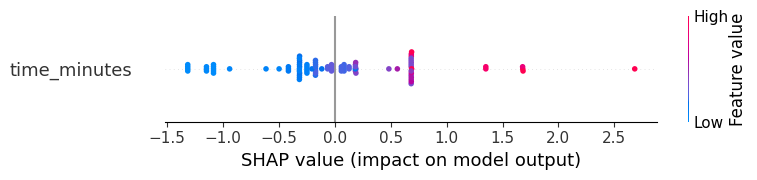

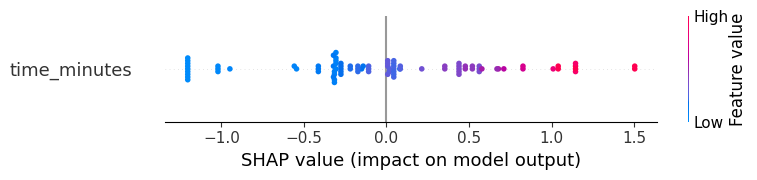

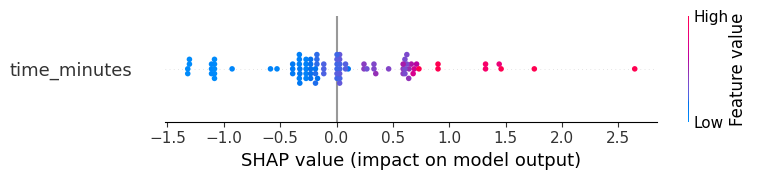

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import shap
import plotly.express as px
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Map the Difficulty column to the new numeric column
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Prepare data for regression
X = df[['time_minutes']]
y = df['Difficulty_Numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

cat_model = cb.CatBoostRegressor(silent=True)
cat_model.fit(X_train, y_train)

# Predictions for SHAP values
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

# Create a function to plot using Plotly
def plot_difficulty_vs_time(df, model_name, y_pred):
    df_plot = df.copy()
    df_plot['Predicted_Difficulty'] = y_pred
    fig = px.scatter(df_plot,
                     x='time_minutes',
                     y='Difficulty_Numeric',
                     title=f'Time vs Difficulty ({model_name})',
                     color_discrete_sequence=['blue'],
                     hover_data={'time_minutes': True, 'Difficulty_Numeric': True},
                     labels={'time_minutes': 'Time (minutes)', 'Difficulty_Numeric': 'Difficulty'})
    fig.add_scatter(x=df_plot['time_minutes'], y=df_plot['Predicted_Difficulty'], mode='lines', name='Predicted Difficulty', line=dict(color='red', width=2))
    fig.show()

# SHAP Values for XGBoost
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

# SHAP Summary Plot for XGBoost with title
shap.summary_plot(shap_values_xgb, X_test, feature_names=['time_minutes'], title='SHAP Values for XGBoost')

# SHAP Values for LightGBM
explainer_lgb = shap.Explainer(lgb_model)
shap_values_lgb = explainer_lgb(X_test)

# SHAP Summary Plot for LightGBM with title
shap.summary_plot(shap_values_lgb, X_test, feature_names=['time_minutes'], title='SHAP Values for LightGBM')

# SHAP Values for CatBoost
explainer_cat = shap.Explainer(cat_model)
shap_values_cat = explainer_cat(X_test)

# SHAP Summary Plot for CatBoost with title
shap.summary_plot(shap_values_cat, X_test, feature_names=['time_minutes'], title='SHAP Values for CatBoost')


lINEAR REGRESSION USING AVERAGES OF DIFFICULTY (AVERAGING DIFFICULTY WITH SAME SCORES)

R-squared: 0.582


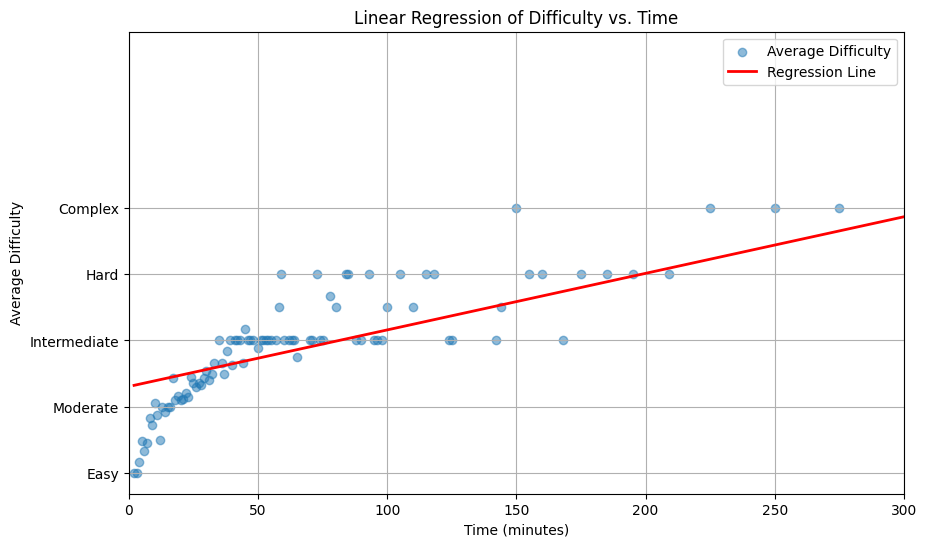

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [1 3 4 5 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Import r2_score
import numpy as np

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Calculate the average difficulty for each unique time
avg_difficulty = df.groupby('time_minutes')['Difficulty_Numeric'].mean().reset_index()

# Fit a linear regression model
X = avg_difficulty['time_minutes'].values.reshape(-1, 1)  # Reshape for sklearn
y = avg_difficulty['Difficulty_Numeric'].values
model = LinearRegression()
model.fit(X, y)

# Create predictions for the regression line
y_pred = model.predict(X)

# Calculate R-squared value
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.3f}")

# Plotting the scatter and regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_difficulty['time_minutes'], avg_difficulty['Difficulty_Numeric'], alpha=0.5, label='Average Difficulty')
plt.plot(avg_difficulty['time_minutes'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression of Difficulty vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Average Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xlim(0, 300)  # Set x-axis limits from 0 to 300
plt.grid(True)
plt.legend()
plt.show()

# Display unique values for reference
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


In [ ]:
POLYNOMIAL REGRESSION

R-squared: 0.793


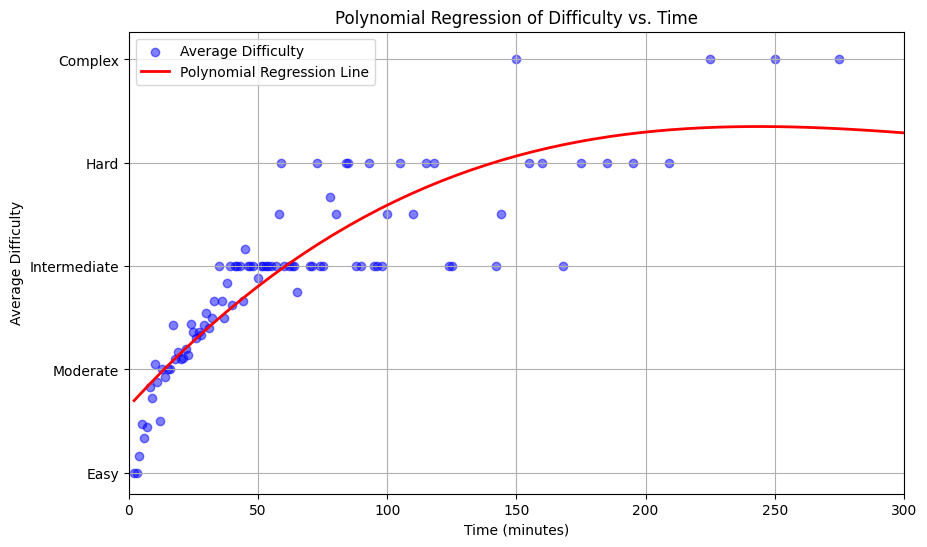

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [1 3 4 5 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Calculate the average difficulty for each unique time
avg_difficulty = df.groupby('time_minutes')['Difficulty_Numeric'].mean().reset_index()

# Fit a polynomial regression model
X = avg_difficulty['time_minutes'].values.reshape(-1, 1)
y = avg_difficulty['Difficulty_Numeric'].values

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=3)  # Change degree as needed for better fit
X_poly = poly.fit_transform(X)

# Fit the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Create predictions for the regression curve
y_pred = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.3f}")

# Create a smooth line for the polynomial regression
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Create range for x-axis
X_range_poly = poly.transform(X_range)  # Transform to polynomial features
y_range_pred = model.predict(X_range_poly)  # Get predictions for the range

# Plotting the original data points and polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(avg_difficulty['time_minutes'], avg_difficulty['Difficulty_Numeric'], alpha=0.5, label='Average Difficulty', color='blue')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Polynomial Regression Line')
plt.title('Polynomial Regression of Difficulty vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Average Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])
plt.xlim(0, 300)
plt.grid(True)
plt.legend()
plt.show()

# Display unique values for reference
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


<ipython-input-53-6c51c2a4483a>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_difficulty = df.groupby('time_bins')['Difficulty_Numeric'].mean().reset_index()


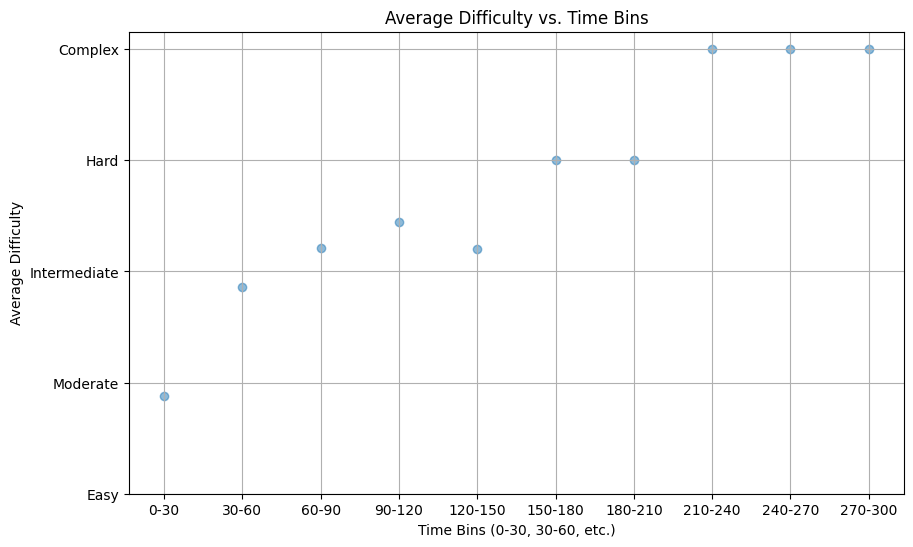

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [1 3 4 5 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)

# Binning the time into intervals
bins = np.arange(0, 301, 30)  # Create bins from 0 to 300 minutes, in 30-minute intervals
labels = range(len(bins) - 1)  # Create labels for the bins

# Cut the time into bins
df['time_bins'] = pd.cut(df['time_minutes'], bins=bins, labels=labels, right=False)

# Calculate the average difficulty for each time bin
avg_difficulty = df.groupby('time_bins')['Difficulty_Numeric'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(avg_difficulty['time_bins'], avg_difficulty['Difficulty_Numeric'], alpha=0.5)
plt.title('Average Difficulty vs. Time Bins')
plt.xlabel('Time Bins (0-30, 30-60, etc.)')
plt.ylabel('Average Difficulty')
plt.yticks([1, 2, 3, 4, 5], ['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks to the specified order
plt.xticks(avg_difficulty['time_bins'], [f"{bins[i]}-{bins[i + 1]}" for i in range(len(bins) - 1)])  # Set x-ticks to show time ranges
plt.grid(True)
plt.show()

# Display unique values for reference
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


<ipython-input-37-81218bbd1bb3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Difficulty_Numeric', y='time_minutes', data=df, palette='Set3')


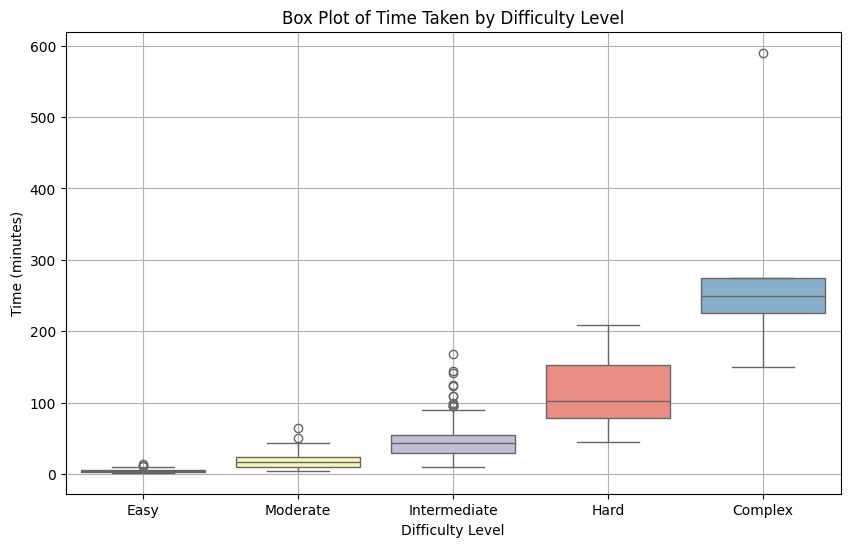

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [1, 3, 4, 5, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[1, 2, 3, 4, 5], ordered=True)

# Create a box plot for Difficulty vs Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Difficulty_Numeric', y='time_minutes', data=df, palette='Set3')

# Customize the plot
plt.title('Box Plot of Time Taken by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Time (minutes)')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set x-ticks
plt.grid(True)
plt.show()

# Display unique values for reference
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


BOX PLOT DISTRIBUTION OF DATA

<ipython-input-55-3015d02b4df8>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Difficulty_Numeric', x='time_minutes', data=df, palette='Set3')


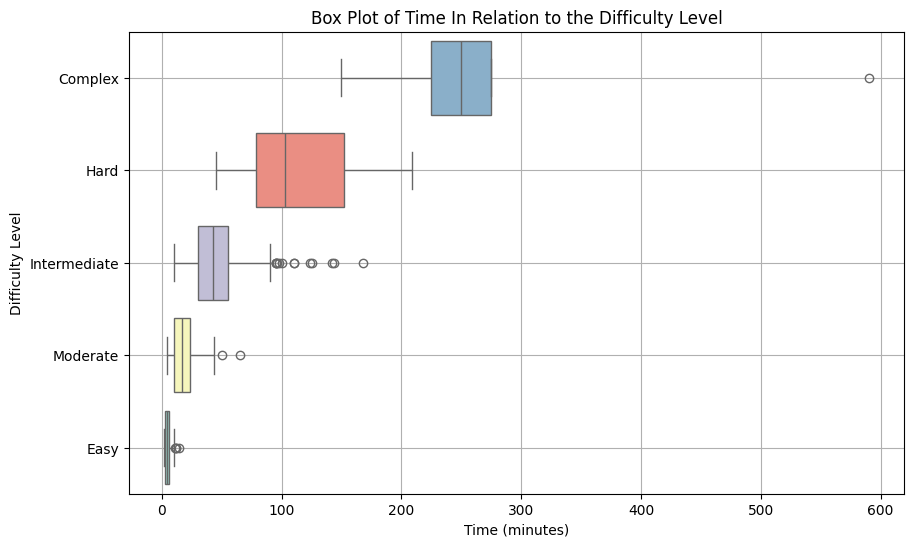

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]
Unique Difficulty_Numeric values: [5, 3, 2, 1, 4]
Categories (5, int64): [5 < 4 < 3 < 2 < 1]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'complex': 1,
    'hard': 2,
    'intermediate': 3,
    'moderate': 4,
    'easy': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Ensure Difficulty_Numeric is treated as an ordered categorical
df['Difficulty_Numeric'] = pd.Categorical(df['Difficulty_Numeric'], categories=[5, 4, 3, 2, 1], ordered=True)

# Create a box plot for Time vs Difficulty
plt.figure(figsize=(10, 6))
sns.boxplot(y='Difficulty_Numeric', x='time_minutes', data=df, palette='Set3')

# Customize the plot
plt.title('Box Plot of Time In Relation to the Difficulty Level')
plt.ylabel('Difficulty Level')
plt.xlabel('Time (minutes)')
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set y-ticks
plt.grid(True)

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

# Display unique values for reference
print("Unique time_minutes values:", df['time_minutes'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


<ipython-input-42-000460e70322>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Difficulty', data=df, palette='Set3', order=difficulty_mapping.keys(), alpha=0.6)


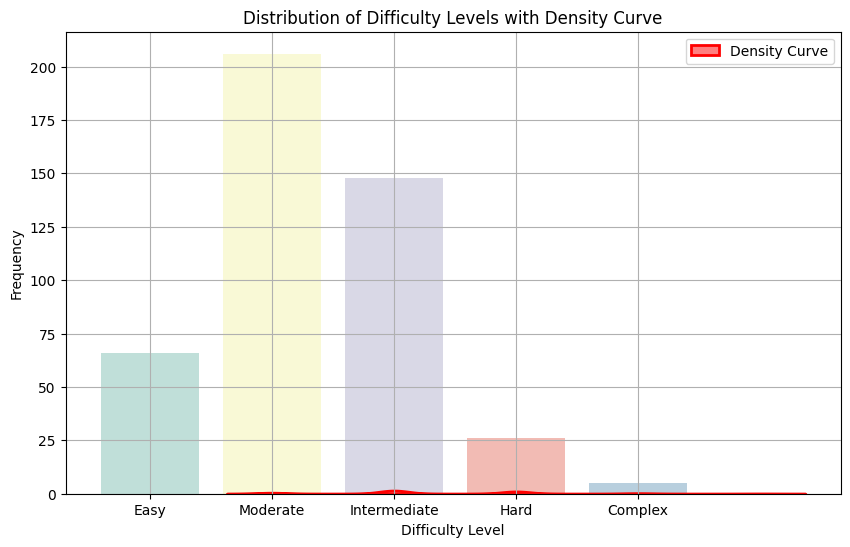

Unique Difficulty values: ['easy' 'intermediate' 'hard' 'complex' 'moderate']
Unique Difficulty_Numeric values: [1 3 4 5 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a count plot for the frequency of Difficulty levels
sns.countplot(x='Difficulty', data=df, palette='Set3', order=difficulty_mapping.keys(), alpha=0.6)

# Create a KDE plot overlay for the difficulty distribution
sns.kdeplot(df['Difficulty_Numeric'].dropna(),
             bw_adjust=0.5,
             fill=True,
             color='red',
             alpha=0.5,
             linewidth=2,
             label='Density Curve')

# Customize the plot
plt.title('Distribution of Difficulty Levels with Density Curve')
plt.xlabel('Difficulty Level')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set x-ticks
plt.grid(True)
plt.legend()
plt.show()

# Display unique values for reference
print("Unique Difficulty values:", df['Difficulty'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


<ipython-input-43-8dc188efb503>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values, palette='Set3', alpha=0.6)


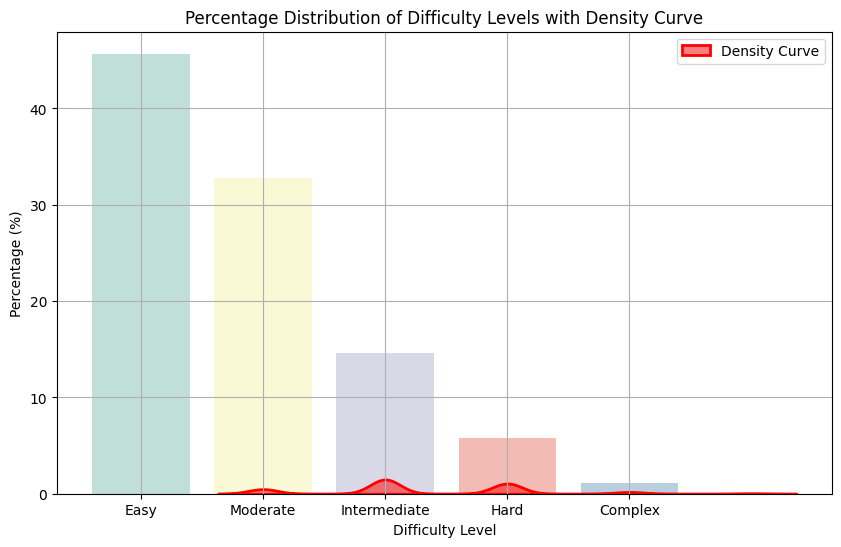

Unique Difficulty values: ['easy' 'intermediate' 'hard' 'complex' 'moderate']
Unique Difficulty_Numeric values: [1 3 4 5 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Calculate percentages for the difficulty levels
difficulty_counts = df['Difficulty'].value_counts(normalize=True) * 100

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a bar plot for the percentage of Difficulty levels
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values, palette='Set3', alpha=0.6)

# Create a KDE plot overlay for the difficulty distribution
sns.kdeplot(df['Difficulty_Numeric'].dropna(),
             bw_adjust=0.5,
             fill=True,
             color='red',
             alpha=0.5,
             linewidth=2,
             label='Density Curve')

# Customize the plot
plt.title('Percentage Distribution of Difficulty Levels with Density Curve')
plt.xlabel('Difficulty Level')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Easy', 'Moderate', 'Intermediate', 'Hard', 'Complex'])  # Set x-ticks
plt.grid(True)
plt.legend()
plt.show()

# Display unique values for reference
print("Unique Difficulty values:", df['Difficulty'].unique())
print("Unique Difficulty_Numeric values:", df['Difficulty_Numeric'].unique())


DATA PRESENTS ITSELF AS A RIGHT TAILED DISTRIBUTION

DISTRIBUTION OF TIME AND ITS OCCURENCE IN DATA

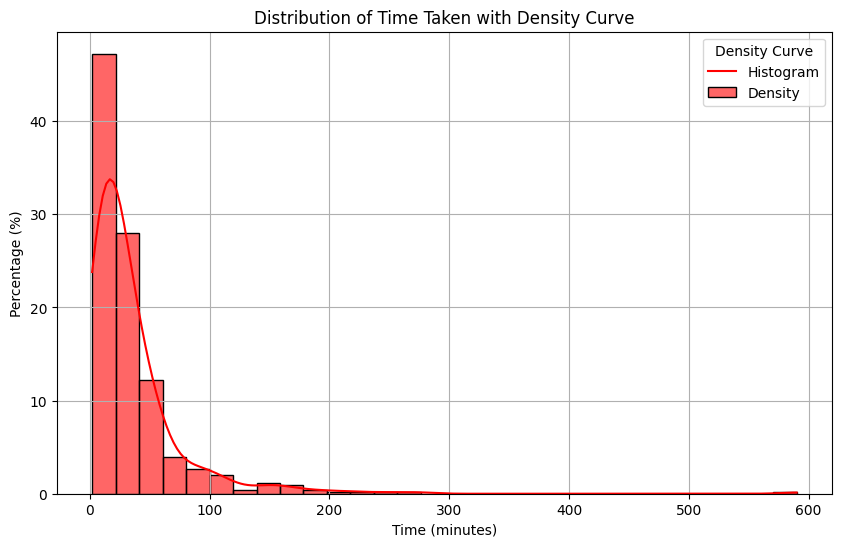

Unique time_minutes values: [  3 142 175  48  30 110   4  52   2 225   6   8  20 250  14  78 118  22
  38  37  71 160   9  13   7  11  51  27 275  65  44  18  40  63  24  55
 144  29  25  41  50  35  54  57 590  33  98  88  28 209  74  90  45  93
  26  84  43  17  62  10  16  19  21 125  47  42 168 100  95  60  80  53
 124  15   5  23 185  64 150  46  12  32  36  31  39 155 105  75 195  59
  58  96  70  85 115  73]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data
df = pd.read_csv('Origo_Database.csv')

# Function to convert time to total minutes
def convert_to_minutes(time_str):
    hours = 0
    minutes = 0
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*hr', time_str)
    if hour_match:
        hours = int(hour_match.group(1))
    minute_match = re.search(r'(\d+)\s*min', time_str)
    if minute_match:
        minutes = int(minute_match.group(1))
    return hours * 60 + minutes

# Apply the function to the Time column
df['time_minutes'] = df['Time'].apply(convert_to_minutes)

# Clean up the Difficulty values
df['Difficulty'] = df['Difficulty'].str.strip().str.lower()  # Remove extra spaces and convert to lower case

# Create the mapping
difficulty_mapping = {
    'easy': 1,
    'moderate': 2,
    'intermediate': 3,
    'hard': 4,
    'complex': 5
}

# Map the Difficulty column to the new numeric column
df['Difficulty_Numeric'] = df['Difficulty'].map(difficulty_mapping)

# Fill NA values in Difficulty_Numeric if any exist
df['Difficulty_Numeric'] = df['Difficulty_Numeric'].fillna(1)  # Fill NAs with 1 (or another appropriate value)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram with a KDE overlay
sns.histplot(df['time_minutes'], bins=30, kde=True, color='red', alpha=0.6, stat='percent')

# Customize the plot
plt.title('Distribution of Time Taken with Density Curve')
plt.xlabel('Time (minutes)')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.legend(title='Density Curve', labels=['Histogram', 'Density'])
plt.show()

# Display unique values for reference
print("Unique time_minutes values:", df['time_minutes'].unique())


In [ ]:
---------------------------------------------------------------------------------------------------------------------------

CLASSIFICATION MODEL FOR NEXT STEPS (EXTRA CREDIT)

Predicting name of origami model based on images alone. Classification step

In [ ]:
# Assuming you have already mounted Google Drive and imported necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import os
import torch
from glob import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T

# Define the CustomDataset class here
class CustomDataset(Dataset):
    def __init__(self, root, transformations=None):
        self.transformations = transformations
        self.im_paths = [im_path for im_path in sorted(glob(f"{root}/*/*/*.jpg"))]

        # Print the found image paths for debugging
        print(f"Image paths found: {self.im_paths}")

        self.cls_names, self.cls_counts, count, data_count = {}, {}, 0, 0
        for idx, im_path in enumerate(self.im_paths):
            class_name = self.get_class(im_path)
            if class_name not in self.cls_names:
                self.cls_names[class_name] = count
                self.cls_counts[class_name] = 1
                count += 1
            else:
                self.cls_counts[class_name] += 1

    def get_class(self, path): return os.path.dirname(path).split("/")[-1]

    def __len__(self): return len(self.im_paths)

    def __getitem__(self, idx):
        im_path = self.im_paths[idx]
        im = Image.open(im_path).convert("RGB")
        gt = self.cls_names[self.get_class(im_path)]

        if self.transformations is not None:
            im = self.transformations(im)

        return im, gt

# Set the root directory to your Google Drive path
root = "/content/drive/My Drive/dataset"  # Adjust as necessary

# Optionally define transformations
mean, std, im_size = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225], 224
tfs = T.Compose([T.Resize((im_size, im_size)), T.ToTensor(), T.Normalize(mean=mean, std=std)])

# Create an instance of the dataset
dataset = CustomDataset(root=root, transformations=tfs)

# Check the length of the dataset
print(f"Number of images in dataset: {len(dataset)}")

# Optionally, view the first item
if len(dataset) > 0:
    img, label = dataset[0]
    print(f"Image size: {img.size()}, Label: {label}")
else:
    print("No images found in the dataset.")


Mounted at /content/drive
Image paths found: ['/content/drive/My Drive/dataset/animals/armadillo/2133.jpg', '/content/drive/My Drive/dataset/animals/armadillo/2147.jpg', '/content/drive/My Drive/dataset/animals/armadillo/2400.jpg', '/content/drive/My Drive/dataset/animals/armadillo/34381.jpg', '/content/drive/My Drive/dataset/animals/armadillo/p_armadillo_fuchimoto_pet_park.jpg', '/content/drive/My Drive/dataset/animals/armadillo/p_armadillo_szinger_sculpture.jpg', '/content/drive/My Drive/dataset/animals/armadillo/p_armadillo_wu.jpg', '/content/drive/My Drive/dataset/animals/armadillo/p_armadillo_yamaguchi_cute.jpg', '/content/drive/My Drive/dataset/animals/bear/15206.jpg', '/content/drive/My Drive/dataset/animals/bear/16537.jpg', '/content/drive/My Drive/dataset/animals/bear/2237.jpg', '/content/drive/My Drive/dataset/animals/bear/2474.jpg', '/content/drive/My Drive/dataset/animals/bear/3792.jpg', '/content/drive/My Drive/dataset/animals/bear/47647.jpg', '/content/drive/My Drive/data

DISCOVERING CLASSES

In [ ]:
# Assuming you have already mounted Google Drive and imported necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import os
import torch
from glob import glob
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T

# Define the CustomDataset class here
class CustomDataset(Dataset):
    def __init__(self, root, transformations=None):
        self.transformations = transformations
        self.im_paths = [im_path for im_path in sorted(glob(f"{root}/*/*/*.jpg"))]

        # Initialize class names and counts
        self.cls_names, self.cls_counts, count = {}, {}, 0
        for idx, im_path in enumerate(self.im_paths):
            class_name = self.get_class(im_path)
            if class_name not in self.cls_names:
                self.cls_names[class_name] = count
                self.cls_counts[class_name] = 1
                count += 1
            else:
                self.cls_counts[class_name] += 1

        # Print the found classes for debugging
        print(f"Classes found: {self.cls_names}")

    def get_class(self, path): return os.path.dirname(path).split("/")[-1]

    def __len__(self): return len(self.im_paths)

    def __getitem__(self, idx):
        im_path = self.im_paths[idx]
        im = Image.open(im_path).convert("RGB")
        gt = self.cls_names[self.get_class(im_path)]

        if self.transformations is not None:
            im = self.transformations(im)

        return im, gt

# Function to get DataLoaders
def get_dls(root, transformations, bs, split=[0.9, 0.05, 0.05], ns=4):
    ds = CustomDataset(root=root, transformations=transformations)

    total_len = len(ds)
    tr_len = int(total_len * split[0])
    vl_len = int(total_len * split[1])
    ts_len = total_len - (tr_len + vl_len)

    tr_ds, vl_ds, ts_ds = random_split(dataset=ds, lengths=[tr_len, vl_len, ts_len])

    tr_dl = DataLoader(tr_ds, batch_size=bs, shuffle=True, num_workers=ns)
    val_dl = DataLoader(vl_ds, batch_size=bs, shuffle=False, num_workers=ns)
    ts_dl = DataLoader(ts_ds, batch_size=1, shuffle=False, num_workers=ns)

    return tr_dl, val_dl, ts_dl, ds.cls_names

# Set the root directory to your Google Drive path
root = "/content/drive/My Drive/dataset"  # Adjust as necessary

# Optionally define transformations
mean, std, im_size = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225], 224
tfs = T.Compose([T.Resize((im_size, im_size)), T.ToTensor(), T.Normalize(mean=mean, std=std)])

# Get the DataLoaders and classes
tr_dl, val_dl, ts_dl, classes = get_dls(root=root, transformations=tfs, bs=16)

# Print the lengths of the DataLoaders and the classes
print(f"Training DataLoader length: {len(tr_dl)}")
print(f"Validation DataLoader length: {len(val_dl)}")
print(f"Test DataLoader length: {len(ts_dl)}")
print("Classes:", classes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes found: {'armadillo': 0, 'bear': 1, 'camel': 2, 'cat': 3, 'chameleon': 4, 'cow': 5, 'crab': 6, 'crocodile': 7, 'deer': 8, 'dog': 9, 'elephant': 10, 'fish': 11, 'fox': 12, 'frog': 13, 'giraffe': 14, 'gorilla': 15, 'grasshopper': 16, 'hippo': 17, 'horse': 18, 'kangaroo': 19, 'lion': 20, 'lizard': 21, 'monkey': 22, 'mouse': 23, 'panda': 24, 'pig': 25, 'rabbit': 26, 'rhinoceros': 27, 'sheep': 28, 'skunk': 29, 'snake': 30, 'squirrel': 31, 'tiger': 32, 'tortoise': 33, 'wolf': 34, 'zebra': 35, 'bat': 36, 'crane': 37, 'duck': 38, 'hummingbird': 39, 'owl': 40, 'parrot': 41, 'peacock': 42, 'pelican': 43, 'penguin': 44, 'rooster': 45, 'sparrow': 46, 'swan': 47, 'alien': 48, 'centaur': 49, 'nun': 50, 'pegasus': 51, 'santa': 52, 'unicorn': 53, 'witch': 54, 'wizard': 55, 'yoda': 56, 'dragon': 57, 'godzilla': 58, 'parasaurolophus': 59, 'pteranodon': 60, 'sauropods': 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

VISUALIZING DATASET AND KEYS

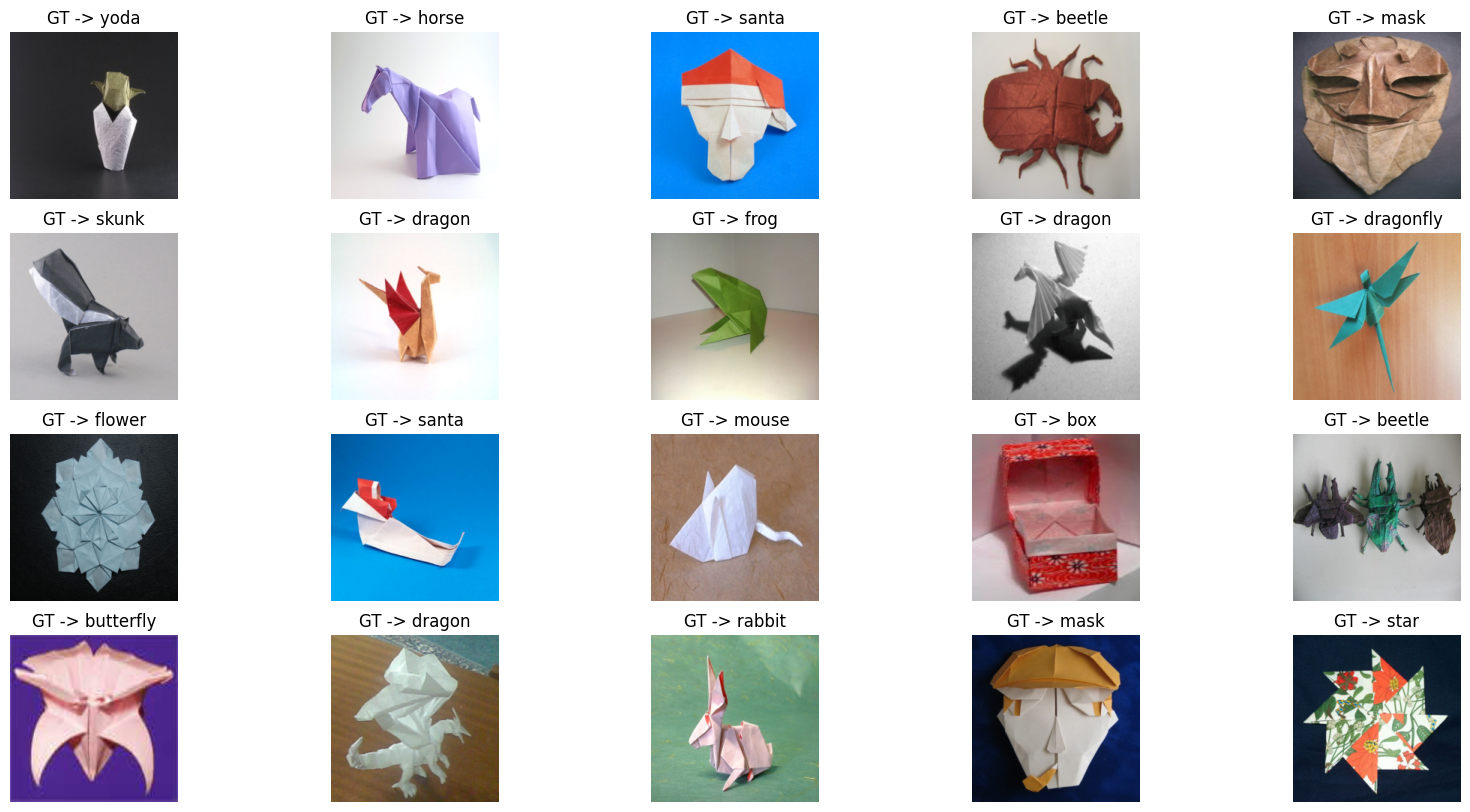

In [ ]:
import random
from matplotlib import pyplot as plt

def tensor_2_im(t, t_type = "rgb"):

    gray_tfs = T.Compose([T.Normalize(mean = [ 0.], std = [1/0.5]), T.Normalize(mean = [-0.5], std = [1])])
    rgb_tfs = T.Compose([T.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]), T.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ])])

    invTrans = gray_tfs if t_type == "gray" else rgb_tfs

    return (invTrans(t) * 255).detach().squeeze().cpu().permute(1,2,0).numpy().astype(np.uint8) if t_type == "gray" else (invTrans(t) * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)

def visualize(data, n_ims, rows, cmap = None, cls_names = None):

    assert cmap in ["rgb", "gray"], "Rasmni oq-qora yoki rangli ekanini aniqlashtirib bering!"
    if cmap == "rgb": cmap = "viridis"

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(data) - 1) for _ in range(n_ims)]
    for idx, indeks in enumerate(indekslar):

        im, gt = data[indeks]
        # Start plot
        plt.subplot(rows, n_ims // rows, idx + 1)
        if cmap: plt.imshow(tensor_2_im(im, cmap), cmap=cmap)
        else: plt.imshow(tensor_2_im(im))
        plt.axis('off')
        if cls_names is not None: plt.title(f"GT -> {cls_names[int(gt)]}")
        else: plt.title(f"GT -> {gt}")

visualize(tr_dl.dataset, 20, 4, "rgb", list(classes.keys()))

CREATING DISTRIBUTION FOR NUMBER OF MODELS PER CLASS

Classes found: {'armadillo': 0, 'bear': 1, 'camel': 2, 'cat': 3, 'chameleon': 4, 'cow': 5, 'crab': 6, 'crocodile': 7, 'deer': 8, 'dog': 9, 'elephant': 10, 'fish': 11, 'fox': 12, 'frog': 13, 'giraffe': 14, 'gorilla': 15, 'grasshopper': 16, 'hippo': 17, 'horse': 18, 'kangaroo': 19, 'lion': 20, 'lizard': 21, 'monkey': 22, 'mouse': 23, 'panda': 24, 'pig': 25, 'rabbit': 26, 'rhinoceros': 27, 'sheep': 28, 'skunk': 29, 'snake': 30, 'squirrel': 31, 'tiger': 32, 'tortoise': 33, 'wolf': 34, 'zebra': 35, 'bat': 36, 'crane': 37, 'duck': 38, 'hummingbird': 39, 'owl': 40, 'parrot': 41, 'peacock': 42, 'pelican': 43, 'penguin': 44, 'rooster': 45, 'sparrow': 46, 'swan': 47, 'alien': 48, 'centaur': 49, 'nun': 50, 'pegasus': 51, 'santa': 52, 'unicorn': 53, 'witch': 54, 'wizard': 55, 'yoda': 56, 'dragon': 57, 'godzilla': 58, 'parasaurolophus': 59, 'pteranodon': 60, 'sauropods': 61, 'spinosaurus': 62, 'stegosaurus': 63, 'trex': 64, 'triceratops': 65, 'ant': 66, 'beetle': 67, 'butterfly': 68, 'dragonfly': 6

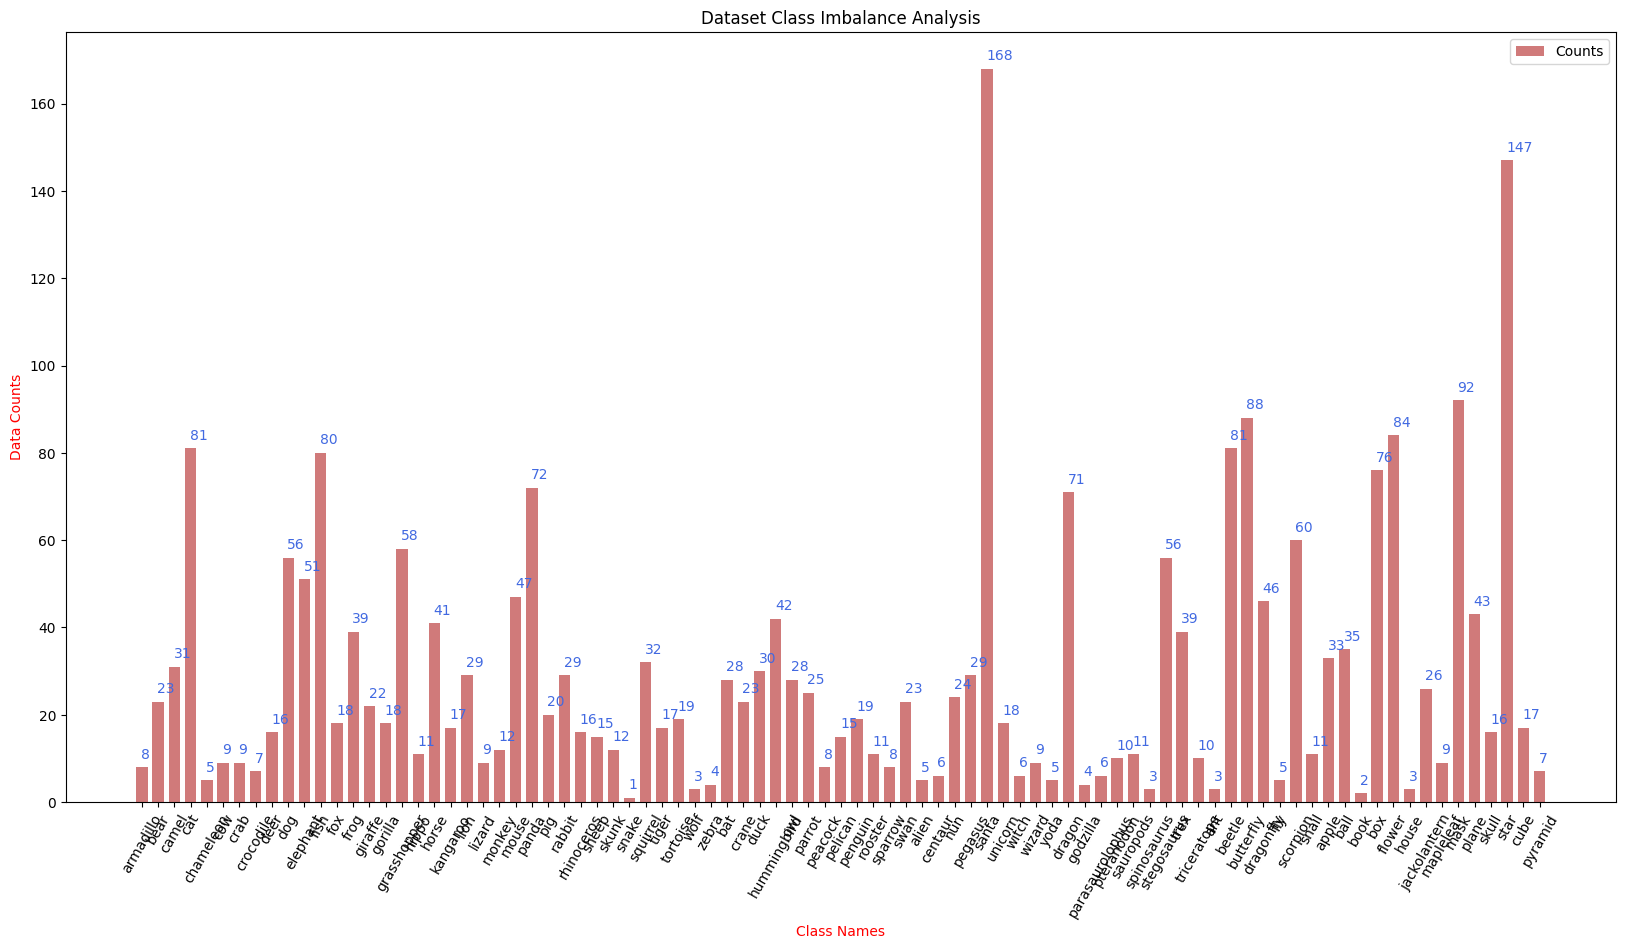

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def data_analysis(root, transformations):
    # Create the dataset
    ds = CustomDataset(root=root, transformations=transformations)
    cls_counts = ds.cls_counts
    cls_names = list(cls_counts.keys())
    counts = np.array(list(cls_counts.values()))

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    indices = np.arange(len(counts))

    # Create bar plot
    ax.bar(indices, counts, width=0.7, color="firebrick", alpha=0.6, label='Counts')
    ax.set_xlabel("Class Names", color="red")
    ax.set_ylabel("Data Counts", color="red")
    ax.set_title("Dataset Class Imbalance Analysis")

    # Add counts on top of bars
    for i, v in enumerate(counts):
        ax.text(i - 0.05, v + 2, str(v), color="royalblue")

    # Create a density curve
    # To plot the density curve, we need to normalize the counts
    density = counts / counts.sum()  # Normalize to get a density-like representation



    # Set x-ticks
    ax.set_xticks(indices)
    ax.set_xticklabels(cls_names, rotation=60)

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function
data_analysis(root=root, transformations=tfs)


CREATING NORMAL DISTRIBUTION

Classes found: {'armadillo': 0, 'bear': 1, 'camel': 2, 'cat': 3, 'chameleon': 4, 'cow': 5, 'crab': 6, 'crocodile': 7, 'deer': 8, 'dog': 9, 'elephant': 10, 'fish': 11, 'fox': 12, 'frog': 13, 'giraffe': 14, 'gorilla': 15, 'grasshopper': 16, 'hippo': 17, 'horse': 18, 'kangaroo': 19, 'lion': 20, 'lizard': 21, 'monkey': 22, 'mouse': 23, 'panda': 24, 'pig': 25, 'rabbit': 26, 'rhinoceros': 27, 'sheep': 28, 'skunk': 29, 'snake': 30, 'squirrel': 31, 'tiger': 32, 'tortoise': 33, 'wolf': 34, 'zebra': 35, 'bat': 36, 'crane': 37, 'duck': 38, 'hummingbird': 39, 'owl': 40, 'parrot': 41, 'peacock': 42, 'pelican': 43, 'penguin': 44, 'rooster': 45, 'sparrow': 46, 'swan': 47, 'alien': 48, 'centaur': 49, 'nun': 50, 'pegasus': 51, 'santa': 52, 'unicorn': 53, 'witch': 54, 'wizard': 55, 'yoda': 56, 'dragon': 57, 'godzilla': 58, 'parasaurolophus': 59, 'pteranodon': 60, 'sauropods': 61, 'spinosaurus': 62, 'stegosaurus': 63, 'trex': 64, 'triceratops': 65, 'ant': 66, 'beetle': 67, 'butterfly': 68, 'dragonfly': 6

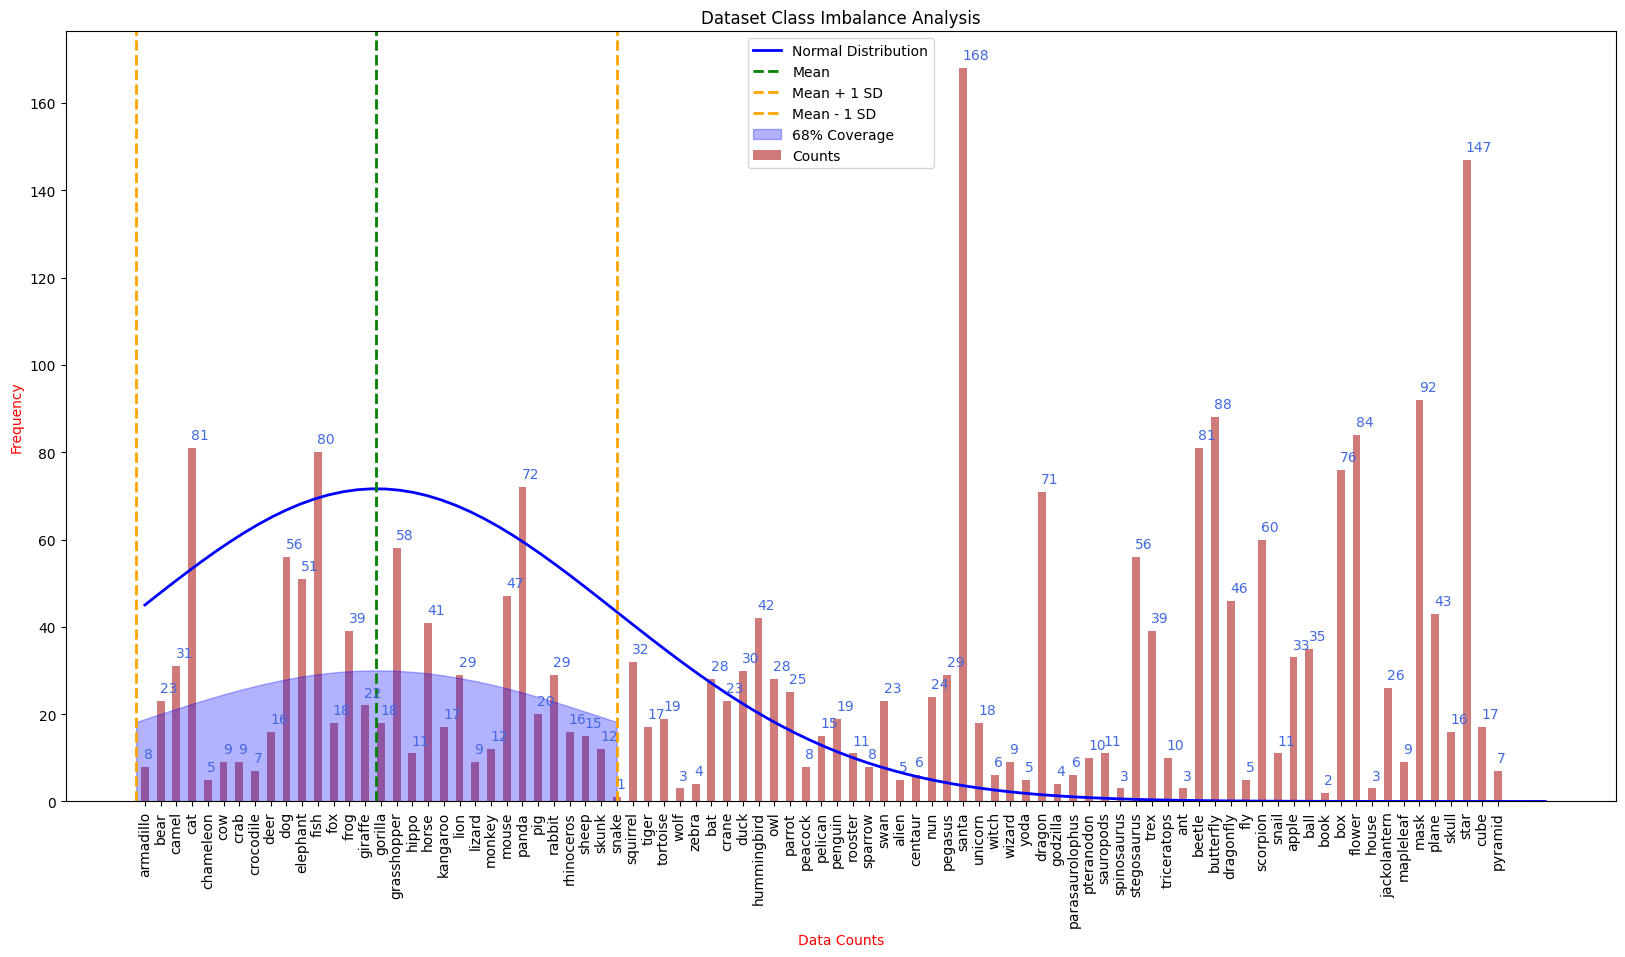

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def data_analysis(root, transformations):
    # Create the dataset
    ds = CustomDataset(root=root, transformations=transformations)
    cls_counts = ds.cls_counts
    cls_names = list(cls_counts.keys())
    counts = np.array(list(cls_counts.values()))

    # Calculate average count per model
    average_count = np.mean(counts)
    print(f"Average count per class: {average_count:.2f}")

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    indices = np.arange(len(counts)) * 2  # Increase spacing between bars

    # Create bar plot with reduced width
    ax.bar(indices, counts, width=1, color="firebrick", alpha=0.6, label='Counts')
    ax.set_xlabel("Data Counts", color="red")
    ax.set_ylabel("Frequency", color="red", rotation=90)
    ax.set_title("Dataset Class Imbalance Analysis")

    # Add counts on top of bars
    for i, v in enumerate(counts):
        ax.text(indices[i] - 0.1, v + 2, str(v), color="royalblue")

    # Calculate mean and standard deviation
    mean = np.mean(counts)
    std_dev = np.std(counts)

    # Create x values for the normal distribution
    x_values = np.linspace(0, max(counts) + 10, 100)  # Extend range beyond max counts
    # Calculate the normal distribution based on the mean and std dev
    normal_distribution = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean) / std_dev) ** 2)

    # Normalize the normal distribution to match the scale of counts
    normal_distribution *= counts.sum() / normal_distribution.sum()  # Scale to total counts

    # Plot the normal distribution
    ax.plot(x_values, normal_distribution, color="blue", lw=2, label='Normal Distribution')

    # Highlight the mean and standard deviations
    ax.axvline(mean, color='green', linestyle='--', lw=2, label='Mean')
    ax.axvline(mean + std_dev, color='orange', linestyle='--', lw=2, label='Mean + 1 SD')
    ax.axvline(mean - std_dev, color='orange', linestyle='--', lw=2, label='Mean - 1 SD')

    # Fill the area under the normal curve for ±1 standard deviation
    x_fill = np.linspace(mean - std_dev, mean + std_dev, 100)
    y_fill = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fill - mean) / std_dev) ** 2)
    y_fill *= counts.sum() / y_fill.sum()  # Scale
    ax.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label='68% Coverage')

    # Set x-ticks
    ax.set_xticks(indices)
    ax.set_xticklabels(cls_names, rotation=90)

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function
data_analysis(root=root, transformations=tfs)


In [ ]:
#Model training and validation utilizing epochs(2 HOURS)

MODEL TRAINING AND VALIDATION USING 8 EPOCHS (ITERATIONS)

In [ ]:
import os
import timm
import torch
from tqdm import tqdm

# Create model
m = timm.create_model("rexnet_150", pretrained=True, num_classes=len(classes))

# Set up training
def train_setup(m):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    return m.to(device).train(), 20, device, torch.nn.CrossEntropyLoss(), torch.optim.Adam(params=m.parameters(), lr=3e-4)

def to_device(batch, device):
    return batch[0].to(device), batch[1].to(device)

def get_metrics(model, ims, gts, loss_fn, epoch_loss, epoch_acc):
    preds = model(ims)
    loss = loss_fn(preds, gts)
    return loss, epoch_loss + (loss.item()), epoch_acc + (torch.argmax(preds, dim=1) == gts).sum().item()

# Initialize training parameters
m, epochs, device, loss_fn, optimizer = train_setup(m)

save_prefix, save_dir = "origami", "saved_models"
print("Start training...")
best_acc, best_loss, threshold, not_improved, patience = 0, float("inf"), 0.01, 0, 5
tr_losses, val_losses, tr_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    epoch_loss, epoch_acc = 0, 0
    for idx, batch in tqdm(enumerate(tr_dl), total=len(tr_dl)):
        ims, gts = to_device(batch, device)
        optimizer.zero_grad()  # Clear previous gradients
        loss, epoch_loss, epoch_acc = get_metrics(m, ims, gts, loss_fn, epoch_loss, epoch_acc)
        loss.backward()
        optimizer.step()

    tr_loss_to_track = epoch_loss / len(tr_dl)
    tr_acc_to_track = epoch_acc / len(tr_dl.dataset)
    tr_losses.append(tr_loss_to_track)
    tr_accs.append(tr_acc_to_track)

    print(f"{epoch + 1}-epoch train process is completed!")
    print(f"{epoch + 1}-epoch train loss          -> {tr_loss_to_track:.3f}")
    print(f"{epoch + 1}-epoch train accuracy      -> {tr_acc_to_track:.3f}")

    # Validation
    m.eval()  # Switch to evaluation mode
    with torch.no_grad():
        val_epoch_loss, val_epoch_acc = 0, 0
        for idx, batch in tqdm(enumerate(val_dl), total=len(val_dl)):
            ims, gts = to_device(batch, device)
            preds = m(ims)
            loss = loss_fn(preds, gts)
            pred_cls = torch.argmax(preds.data, dim=1)
            val_epoch_acc += (pred_cls == gts).sum().item()
            val_epoch_loss += loss.item()

        val_loss_to_track = val_epoch_loss / len(val_dl)
        val_acc_to_track = val_epoch_acc / len(val_dl.dataset)
        val_losses.append(val_loss_to_track)
        val_accs.append(val_acc_to_track)

        print(f"{epoch + 1}-epoch validation process is completed!")
        print(f"{epoch + 1}-epoch validation loss     -> {val_loss_to_track:.3f}")
        print(f"{epoch + 1}-epoch validation accuracy -> {val_acc_to_track:.3f}")

        # Check for improvement and save the model
        if val_loss_to_track < (best_loss + threshold):
            os.makedirs(save_dir, exist_ok=True)
            best_loss = val_loss_to_track
            torch.save(m.state_dict(), f"{save_dir}/{save_prefix}_best_model.pth")
        else:
            not_improved += 1
            print(f"Loss value did not decrease for {not_improved} epochs")
            if not_improved == patience:
                print(f"Stop training since loss value did not decrease for {patience} epochs.")
                break


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



model.safetensors:   0%|          | 0.00/39.2M [00:00<?, ?B/s]

Start training...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.

  0%|          | 0/144 [00:09<?, ?it/s]


KeyboardInterrupt: 

Might consider training for additional epochs (10-15) while using early stopping to avoid overfitting, adjusting learning rates, and employing regularization methods to help the model generalize better.

In [ ]:
#Epochs vs Loss and Accuracy

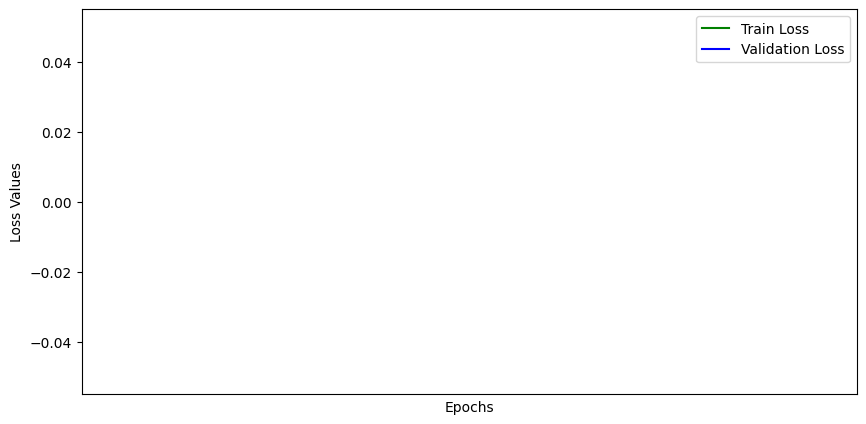

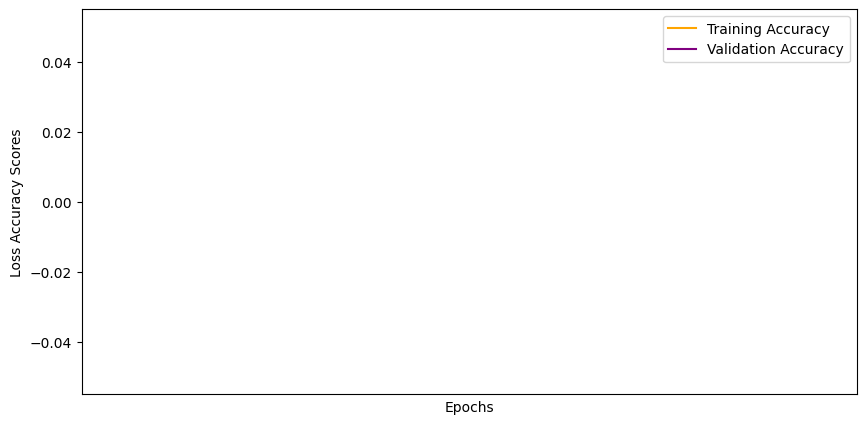

In [ ]:
#Training Loss and Validation graphs
def learning_curves(tr_losses, val_losses, tr_accs, val_accs):

    plt.figure(figsize = (10, 5))
    plt.plot(tr_losses, label = "Train Loss", c = "green")
    plt.plot(val_losses, label = "Validation Loss", c = "blue")
    plt.xlabel("Epochs"); plt.ylabel("Loss Values")
    plt.xticks(ticks = np.arange(len(tr_losses)), labels = [i for i in range(1, len(tr_losses) + 1)])
    plt.legend(); plt.show()

    plt.figure(figsize = (10, 5))
    plt.plot(tr_accs, label = "Training Accuracy", c = "orange")
    plt.plot(val_accs, label = "Validation Accuracy", c = "purple")
    plt.xlabel("Epochs"); plt.ylabel("Loss Accuracy Scores")
    plt.xticks(ticks = np.arange(len(tr_accs)), labels = [i for i in range(1, len(tr_accs) + 1)])
    plt.legend(); plt.show()

learning_curves(tr_losses, val_losses, tr_accs, val_accs)

POTENTIAL IMPROVED MODEL TO IMPROVE AND HYPER TUNE MODEL

In [ ]:
import torch
import timm
from torchvision import transforms as T
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

# Define your transformations
transformations = T.Compose([
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Create model
m = timm.create_model("efficientnet_b3", pretrained=True, num_classes=len(classes))

# Freeze base model layers and only train final layer
for param in m.parameters():
    param.requires_grad = False
for param in m.head.parameters():
    param.requires_grad = True

# Define training setup
def train_setup(m):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    m.to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(m.parameters(), lr=3e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
    return m, 50, device, loss_fn, optimizer, scheduler  # Increased epochs

m, epochs, device, loss_fn, optimizer, scheduler = train_setup(m)

# Training loop
print("Start training...")
tr_losses, val_losses, tr_accs, val_accs = [], [], [], []
best_loss = float("inf")

for epoch in range(epochs):
    m.train()  # Set model to training mode
    epoch_loss, epoch_acc = 0, 0

    for idx, batch in tqdm(enumerate(tr_dl)):
        ims, gts = batch
        ims, gts = ims.to(device), gts.to(device)

        optimizer.zero_grad()
        preds = m(ims)
        loss = loss_fn(preds, gts)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += (torch.argmax(preds, dim=1) == gts).sum().item()

    # Calculate training metrics
    tr_loss_to_track = epoch_loss / len(tr_dl)
    tr_acc_to_track = epoch_acc / len(tr_dl.dataset)
    tr_losses.append(tr_loss_to_track)
    tr_accs.append(tr_acc_to_track)

    print(f"{epoch + 1}-epoch train loss -> {tr_loss_to_track:.3f}")
    print(f"{epoch + 1}-epoch train accuracy -> {tr_acc_to_track:.3f}")

    # Validation phase
    m.eval()  # Set model to evaluation mode
    val_epoch_loss, val_epoch_acc = 0, 0
    with torch.no_grad():
        for idx, batch in enumerate(val_dl):
            ims, gts = batch
            ims, gts = ims.to(device), gts.to(device)

            preds = m(ims)
            loss = loss_fn(preds, gts)
            pred_cls = torch.argmax(preds.data, dim=1)

            val_epoch_acc += (pred_cls == gts).sum().item()
            val_epoch_loss += loss.item()

    # Calculate validation metrics
    val_loss_to_track = val_epoch_loss / len(val_dl)
    val_acc_to_track = val_epoch_acc / len(val_dl.dataset)
    val_losses.append(val_loss_to_track)
    val_accs.append(val_acc_to_track)

    print(f"{epoch + 1}-epoch validation loss -> {val_loss_to_track:.3f}")
    print(f"{epoch + 1}-epoch validation accuracy -> {val_acc_to_track:.3f}")

    # Learning rate adjustment
    scheduler.step()

    # Save best model
    if val_loss_to_track < best_loss:
        best_loss = val_loss_to_track
        torch.save(m.state_dict(), f"saved_models/origami_best_model.pth")

# Plot losses and accuracies
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(tr_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.subplot(1, 2, 2)
plt.plot(tr_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

AttributeError: 'EfficientNet' object has no attribute 'head'

Testing code on newer test models. Will improve model later

In [ ]:
import cv2

class SaveFeatures():

    """ Extract pretrained activations"""
    features = None
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = ((output.cpu()).data).numpy()
    def remove(self): self.hook.remove()

def getCAM(conv_fs, linear_weights, class_idx):

    bs, chs, h, w = conv_fs.shape
    cam = linear_weights[class_idx].dot(conv_fs[0,:, :, ].reshape((chs, h * w)))
    cam = cam.reshape(h, w)

    return (cam - np.min(cam)) / np.max(cam)

def inference(model, device, test_dl, num_ims, row, final_conv, fc_params, cls_names = None):

    weight, acc = np.squeeze(fc_params[0].cpu().data.numpy()), 0
    activated_features = SaveFeatures(final_conv)
    preds, images, lbls = [], [], []
    for idx, batch in tqdm(enumerate(test_dl)):
        im, gt = to_device(batch, device)
        pred_class = torch.argmax(model(im), dim = 1)
        acc += (pred_class == gt).sum().item()
        images.append(im)
        preds.append(pred_class.item())
        lbls.append(gt.item())

    print(f"Accuracy of the model on the test data -> {(acc / len(test_dl.dataset)):.3f}")

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(images) - 1) for _ in range(num_ims)]

    for idx, indeks in enumerate(indekslar):

        im = images[indeks].squeeze()
        pred_idx = preds[indeks]
        heatmap = getCAM(activated_features.features, weight, pred_idx)

        # Start plot
        plt.subplot(row, num_ims // row, idx + 1)
        plt.imshow(tensor_2_im(im), cmap = "gray"); plt.axis("off")
        plt.imshow(cv2.resize(heatmap, (im_size, im_size), interpolation=cv2.INTER_LINEAR), alpha=0.4, cmap='jet'); plt.axis("off")

        if cls_names is not None: plt.title(f"GT -> {cls_names[int(lbls[indeks])]} ; PRED -> {cls_names[int(preds[indeks])]}", color=("green" if {cls_names[int(lbls[indeks])]} == {cls_names[int(preds[indeks])]} else "red"))
        else: plt.title(f"GT -> {gt} ; PRED -> {pred}")

#m.load_state_dict(torch.load(f"{save_dir}/{save_prefix}_best_model.pth"))
m.eval()
final_conv, fc_params = m.features[-1], list(m.head.fc.parameters())
inference(model = m.to(device), device = device, test_dl = ts_dl, num_ims = 20, row = 4, cls_names = list(classes.keys()), final_conv = final_conv, fc_params = fc_params)

AttributeError: 'EfficientNet' object has no attribute 'features'